<a href="https://colab.research.google.com/github/Sirayus/colab-notebook/blob/main/2021MAY14_project_academy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Films Analysis

## Import Library and Data

In [257]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
%matplotlib inline

In [258]:
!pip install kaggle

In [259]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"sirayushongsanandana","key":"2252546465b64b9af446db26cb4c2b19"}'}

In [260]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [261]:
!kaggle datasets download -d sirayushongsanandana/films-analysis

films-analysis.zip: Skipping, found more recently modified local copy (use --force to force download)


In [262]:
!ls

 files		     'kaggle (1).json'	 kaggle.json
 films-analysis.zip  'kaggle (2).json'	 sample_data


In [263]:
import zipfile
zip_ref = zipfile.ZipFile("films-analysis.zip", "r") # File name
zip_ref.extractall("files")
zip_ref.close()

In [264]:
rotten =pd.read_csv('/content/files/rotten.csv').iloc[:, 1:]
imdb_film = pd.read_csv('/content/files/imdb_film.csv').iloc[:, 2:]
imdb_film_crew = pd.read_csv('/content/files/film_crew.csv').iloc[:, 2:]
oscar = pd.read_csv('/content/files/oscar_data.csv').iloc[:, 1:]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [265]:
rotten =pd.read_csv('/content/files/rotten.csv').iloc[:, 1:]

## Cleaning

In [266]:
# ไม่ได้ผล เพราะหนังชื่อซ้ำกัน จะถูก join ผิด
# rotten['film_year'] = rotten['film_year'].str.rsplit(n=1, expand=True)[0]
# oscar['film&year'] = oscar['film&year'].str.rsplit(n=1, expand=True)[0]

In [267]:
# Split genre into 3 sub-genre
imdb_film[['genre_1','genre_2','genre_3']] = imdb_film['genre'].str.split(', ',expand=True)
imdb_film = imdb_film.loc[:, ['film_year', 'year', 'imdbscore', 'metascore', 'genre_1', 'genre_2', 'genre_3', 'duration', 'country', 'language', 'director', 'writer', 'production_company']]

In [268]:
imdb_film['year'] = imdb_film['year'].astype(str).replace('TV Movie 2019', '2019')
imdb_film['year'] = imdb_film['year'].astype(int)

In [269]:
imdb_film_crew['year'] = imdb_film_crew['year'].astype(str).replace('TV Movie 2019', '2019')
imdb_film_crew['year'] = imdb_film_crew['year'].astype(int)

## Exploring Data

In [270]:
rotten.head(2)

film_year  ...  audience_count
0  Percy Jackson & the Olympians: The Lightning T...  ...        254421.0
1                                 Please Give (2010)  ...         11574.0

[2 rows x 16 columns]

In [271]:
oscar.head(2)

film&year  year_film  ...                 name  awarded
0         The Noose (1927)       1927  ...  Richard Barthelmess    False
1  The Last Command (1927)       1927  ...        Emil Jannings     True

[2 rows x 7 columns]

In [272]:
# Not using in this moment
imdb_film.head(2)

film_year  ...          production_company
0                   Miss Jerry (1894)  ...  Alexander Black Photoplays
1  The Story of the Kelly Gang (1906)  ...              J. and N. Tait

[2 rows x 13 columns]

In [273]:
imdb_film_crew.head(2)

film_year  year  ...  date_of_death                 reason_of_death
0  Miss Jerry (1894)  1894  ...     1951-08-19                             NaN
1  Miss Jerry (1894)  1894  ...     1933-04-20  severe cold and heart weakness

[2 rows x 16 columns]

## Merging and Choosing which merge to use

ข้อมูลมีปัญหาที่ชื่อหนังไม่ตรงกัน ทำให้เมื่อ merge กันแล้วข้อมูลหายไปมาก
1. อาจใช้การจับคู่แยกกัน oscar + rotten, oscar + imdb
2. จับรวมกันหมดเลย oscar + imdb + rotten (using inner join)
3. จับคู่ imdb + rotten เพื่อหา pattern บางอย่าง
4. imdb_crew คิดว่า filter ด้วยหน้าที่ก่อน แล้วค่อยนำมา merge ไม่เช่นนั้นข้อมูลเยอะเกิน

In [274]:
print(oscar.shape)
print(rotten.shape)

(10091, 7)
(17712, 16)


In [275]:
tmp1 = pd.merge( left = oscar, right = rotten, left_on = 'film&year', right_on = 'film_year', how = 'left')

In [276]:
oscar_rotten = tmp1
oscar_rotten

film&year  ...  audience_count
0                            The Noose (1927)  ...             NaN
1                     The Last Command (1927)  ...             NaN
2                      A Ship Comes In (1927)  ...             NaN
3                           7th Heaven (1927)  ...             NaN
4                       Sadie Thompson (1927)  ...             NaN
...                                       ...  ...             ...
10086                       Knives Out (2019)  ...         33834.0
10087                   Marriage Story (2019)  ...           184.0
10088                             1917 (2019)  ...             NaN
10089  Once upon a Time...in Hollywood (2019)  ...             NaN
10090                         Parasite (2019)  ...             NaN

[10091 rows x 23 columns]

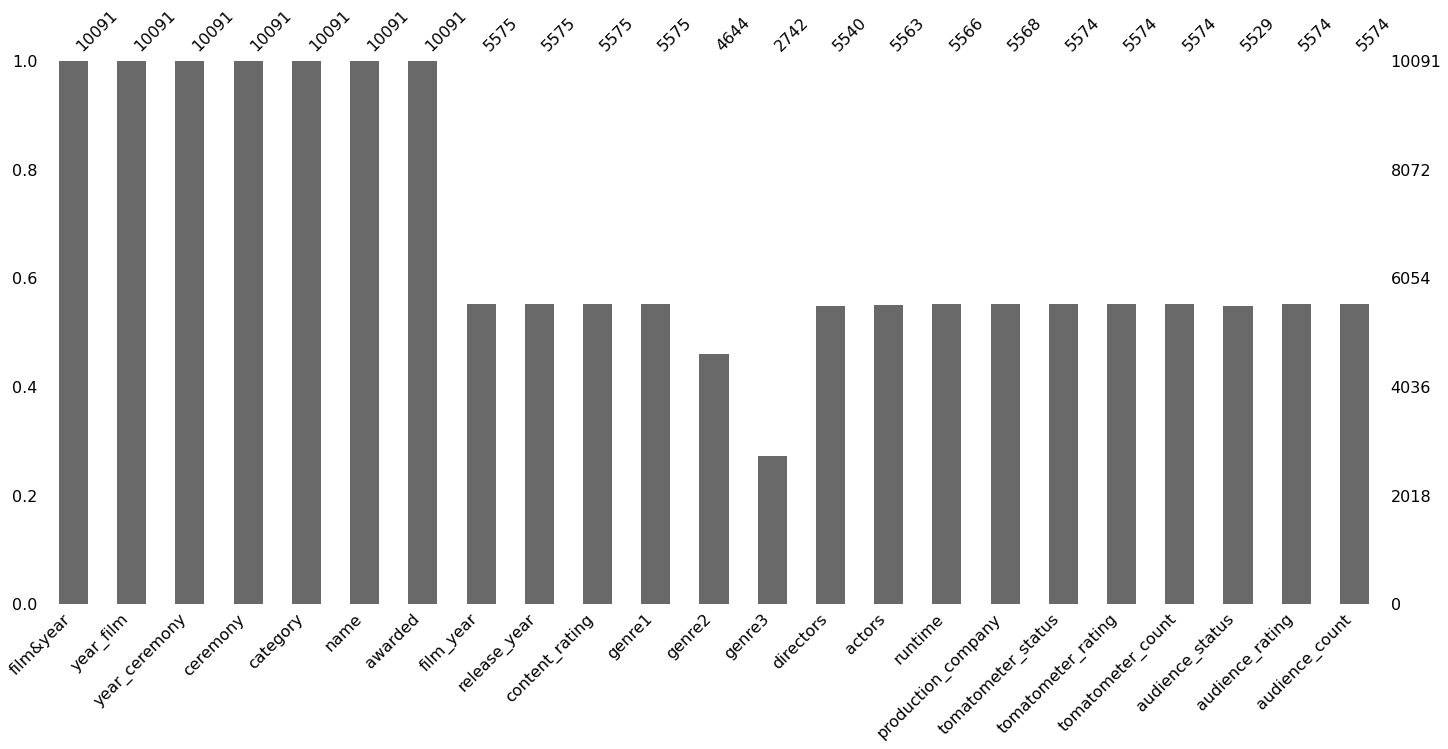

In [277]:
msno.bar(oscar_rotten)

In [278]:
tmp2 = pd.merge( left = oscar, right = imdb_film, left_on = 'film&year', right_on = 'film_year', how = 'inner')

In [279]:
oscar_imdb_film = tmp2
oscar_imdb_film

film&year  ...       production_company
0              Disraeli (1929)  ...             Warner Bros.
1              Disraeli (1929)  ...             Warner Bros.
2              Disraeli (1929)  ...             Warner Bros.
3                 Sally (1929)  ...  First National Pictures
4               Holiday (1930)  ...           Pathé Exchange
...                        ...  ...                      ...
1869     Corpus Christi (2019)  ...               Aurum Film
1870          Rocketman (2019)  ...       Paramount Pictures
1871        Brotherhood (2019)  ...        Industry Pictures
1872           Ad Astra (2019)  ...     New Regency Pictures
1873  Avengers: Endgame (2019)  ...           Marvel Studios

[1874 rows x 20 columns]

In [280]:
# msno.matrix(oscar_imdb_rotten)

In [281]:
tmp3 = pd.merge( left = oscar_imdb_film, right = rotten, left_on = 'film&year', right_on = 'film_year', how = 'inner')

In [282]:
oscar_imdb_rotten = tmp3
oscar_imdb_rotten

film&year  year_film  ...  audience_rating  audience_count
0               Roberta (1935)       1935  ...             65.0          1088.0
1         San Francisco (1936)       1936  ...             70.0          1337.0
2         San Francisco (1936)       1936  ...             70.0          1337.0
3         San Francisco (1936)       1936  ...             70.0          1337.0
4         San Francisco (1936)       1936  ...             70.0          1337.0
...                        ...        ...  ...              ...             ...
1494        Toy Story 4 (2019)       2019  ...             94.0         53146.0
1495     The Lighthouse (2019)       2019  ...             72.0          1932.0
1496          Rocketman (2019)       2019  ...             88.0         21651.0
1497           Ad Astra (2019)       2019  ...             40.0         10263.0
1498  Avengers: Endgame (2019)       2019  ...             90.0         70334.0

[1499 rows x 36 columns]

In [283]:
sns.reset_defaults()

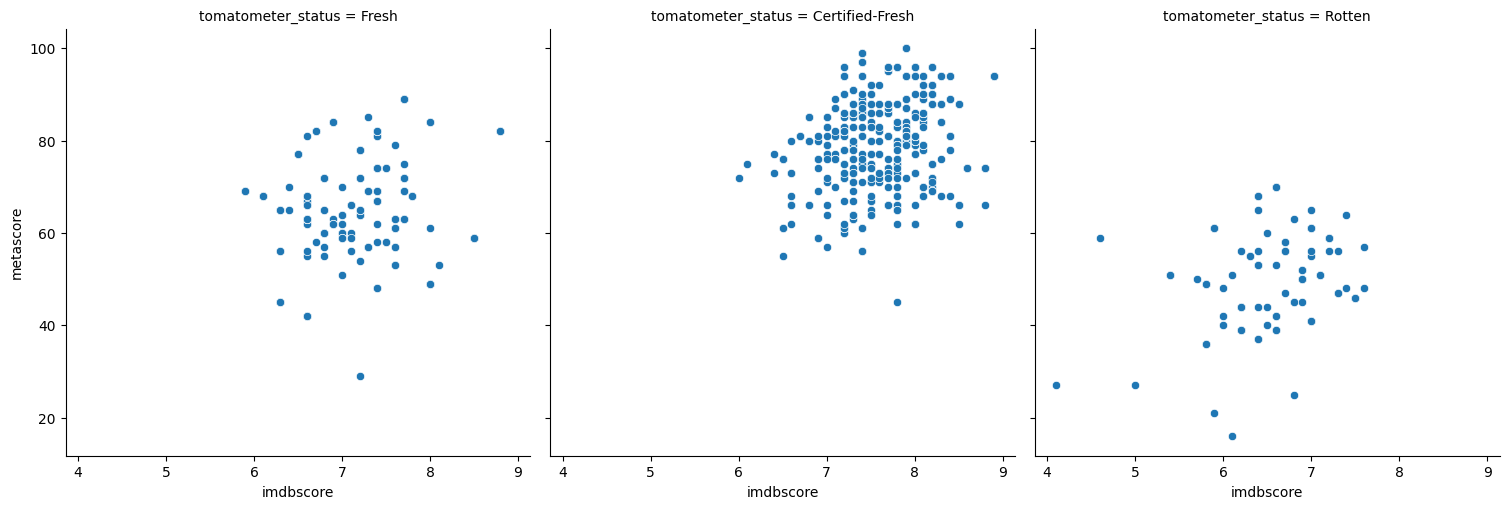

In [284]:
sns.relplot(data=oscar_imdb_rotten, kind='scatter', x='imdbscore', y='metascore', col='tomatometer_status')

In [285]:
tmp4 = pd.merge( left = imdb_film, right = rotten, left_on = 'film_year', right_on = 'film_year', how = 'left')
tmp4

film_year  ...  audience_count
0                          Miss Jerry (1894)  ...             NaN
1         The Story of the Kelly Gang (1906)  ...             NaN
2                      Den sorte drøm (1911)  ...             NaN
3                           Cleopatra (1912)  ...             NaN
4                           L'Inferno (1911)  ...             NaN
...                                      ...  ...             ...
85852                         Le lion (2020)  ...             NaN
85853  De Beentjes van Sint-Hildegard (2020)  ...             NaN
85854       Padmavyuhathile Abhimanyu (2019)  ...             NaN
85855               Sokagin Çocuklari (2019)  ...             NaN
85856      La vida sense la Sara Amat (2019)  ...             NaN

[85857 rows x 28 columns]

In [286]:
# tmp4[ ~tmp4['tomatometer_status'].isna()]
imdb_film_rotten = tmp4

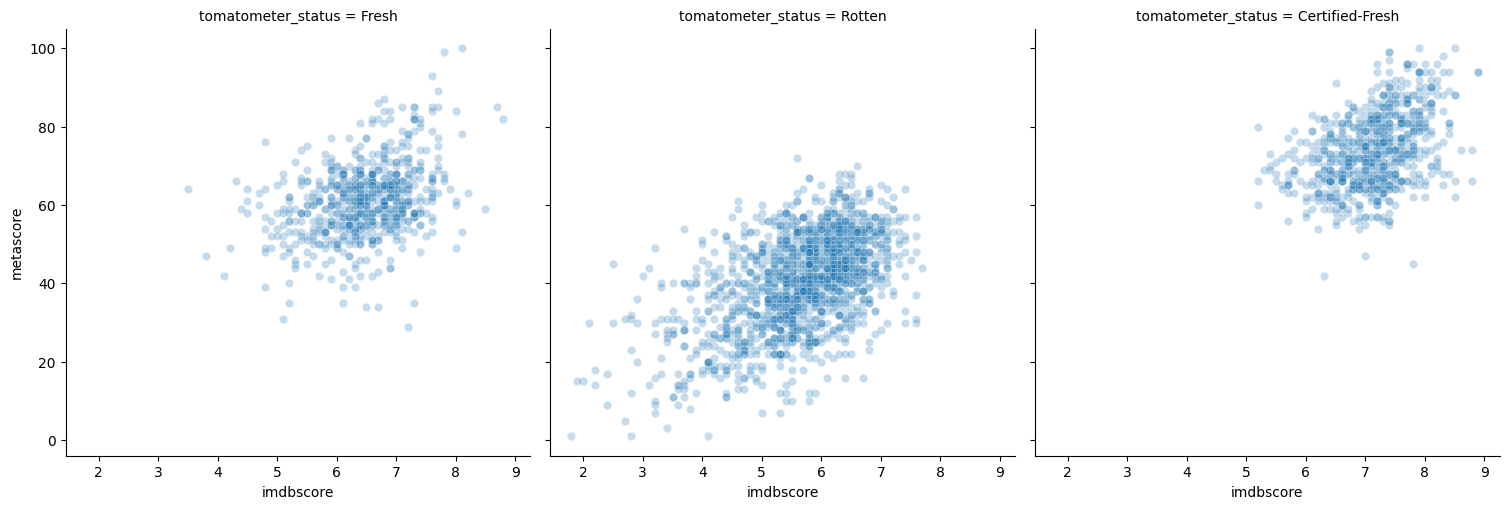

In [287]:
sns.relplot(data=imdb_film_rotten, kind='scatter', x='imdbscore', y='metascore', col='tomatometer_status', alpha=0.25)

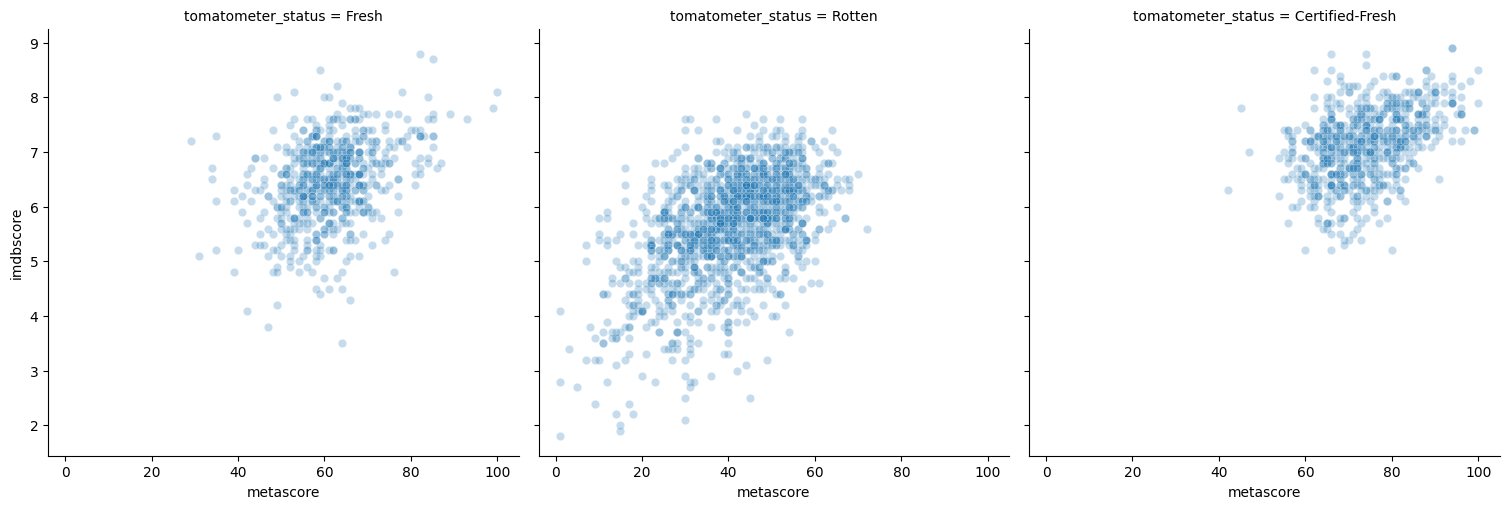

In [288]:
sns.relplot(data=imdb_film_rotten, kind='scatter', x='metascore', y='imdbscore', col='tomatometer_status', alpha=0.25)

## Trend of women in the industry (actress role)

In [289]:
imdb_actress = imdb_film_crew[ imdb_film_crew['category'].str.upper().str.contains('ACTRESS')] 

# Using 'nunique' to show that how many distinct women got a role in each year
imdb_actress_a = imdb_actress.groupby('year').agg({'name': 'nunique'}).reset_index()

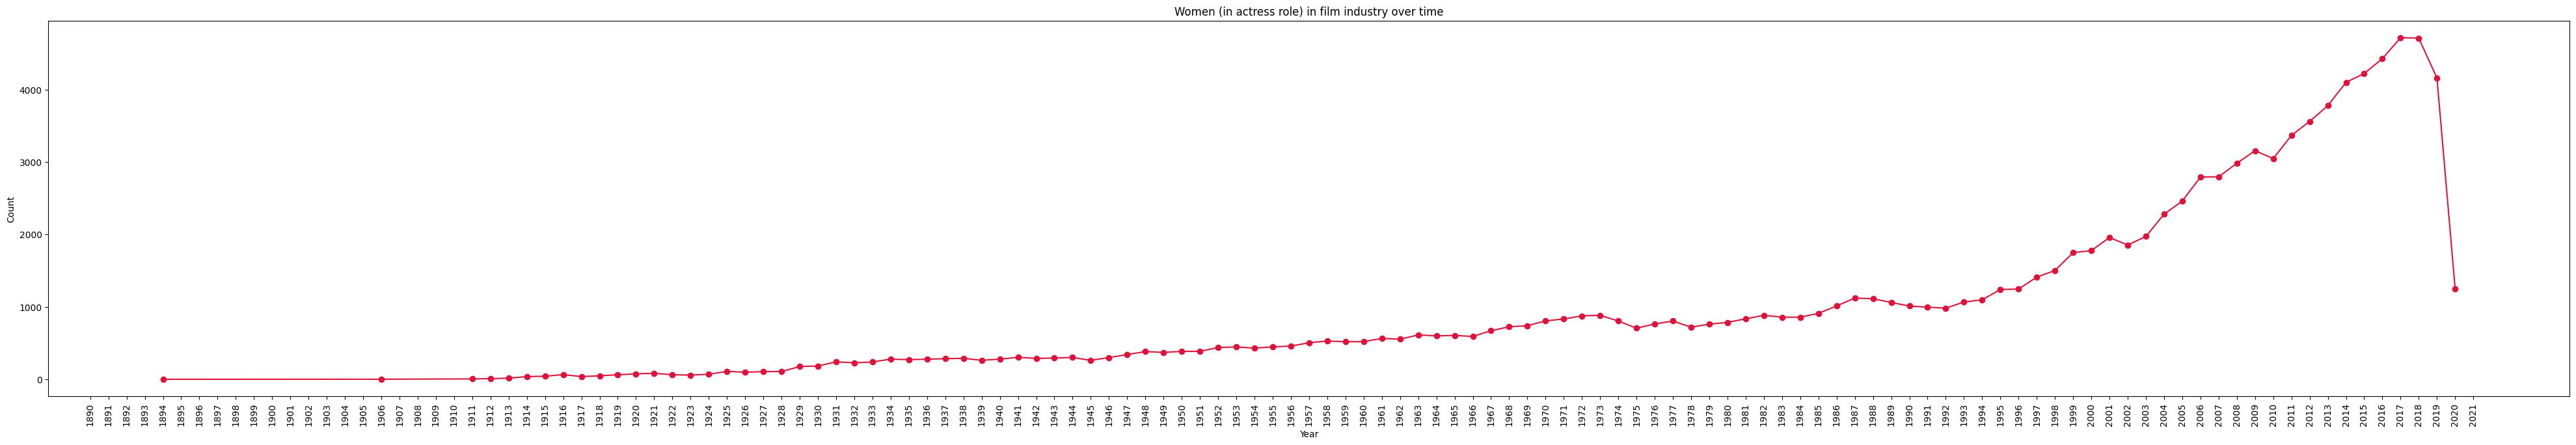

In [290]:
# Using bar graph but data before 1900 is too small to be seen. I change it to line graph.
year_tick = np.arange(1890,2022,step = 1)
plt.figure(figsize=(50,7.5))
plt.xticks(ticks=year_tick,  rotation=90)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Women (in actress role) in film industry over time')
plt.scatter(imdb_actress_a['year'], imdb_actress_a['name'], c='crimson', marker='o')
plt.plot(imdb_actress_a['year'], imdb_actress_a['name'], c='crimson')

In [291]:
oscar_actress = oscar[ oscar['category'].str.upper().str.contains('ACTRESS')]
oscar_actress = oscar_actress.groupby('year_film').agg({'name': 'count'}).reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  del sys.path[0]


(1890.0, 2021.0, 0.655127628436497, 10000.0)

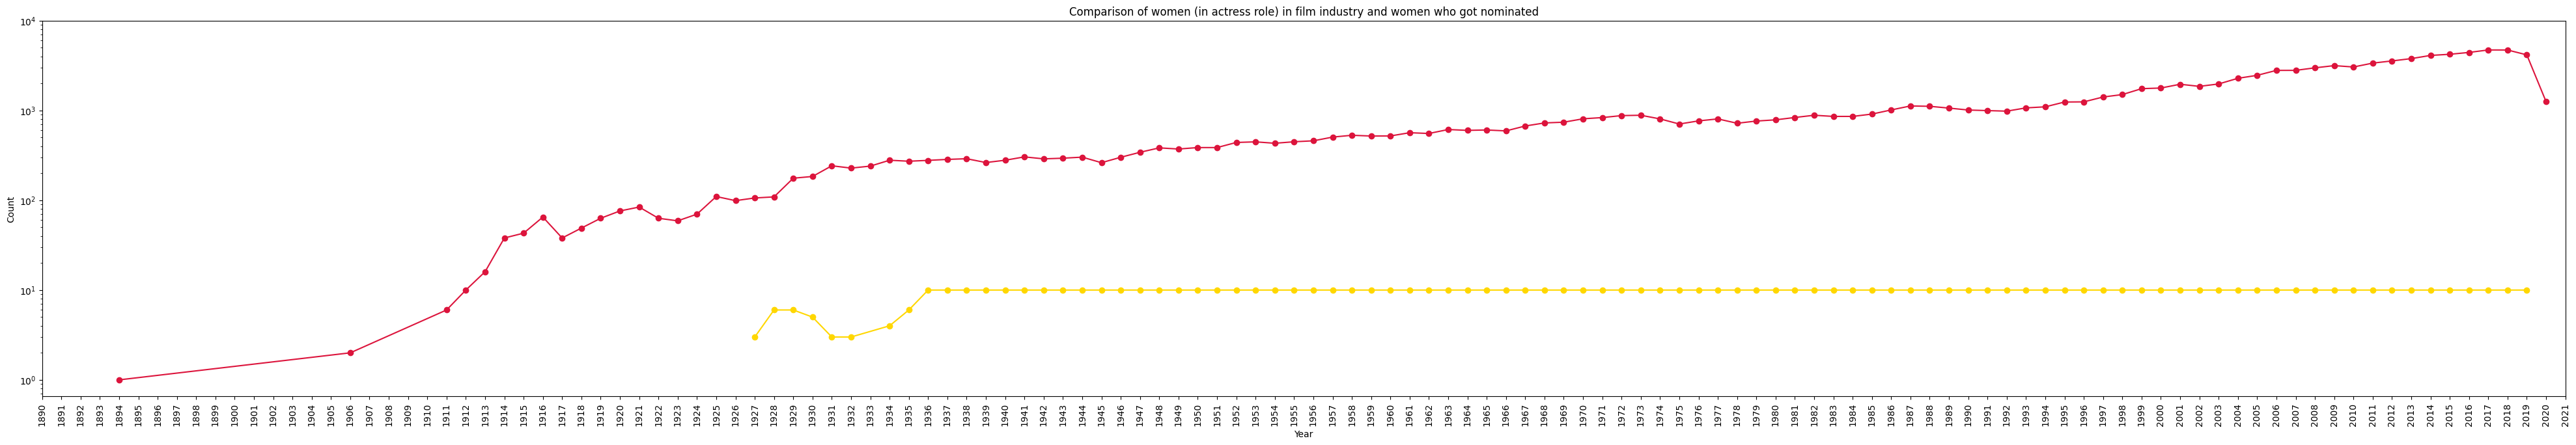

In [292]:
# Women nominated in oscar
year_tick = np.arange(1890,2022,step = 1)
plt.figure(figsize=(50,7.5))
plt.xticks(ticks=year_tick,  rotation=90)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Comparison of women (in actress role) in film industry and women who got nominated')
plt.scatter(oscar_actress['year_film'], oscar_actress['name'], c='gold', marker='o')
plt.plot(oscar_actress['year_film'], oscar_actress['name'], color='gold')
plt.scatter(imdb_actress_a['year'], imdb_actress_a['name'], c='crimson', marker='o')
plt.plot(imdb_actress_a['year'], imdb_actress_a['name'], c='crimson')
plt.yscale('log')
plt.axis([1890, 2021, 0, 10000])

In [293]:
imdb_actor = imdb_film_crew[ imdb_film_crew['category'].str.upper().str.contains('ACTOR')]
# Using 'nunique' to show that how many distinct women got a role in each year
imdb_actor = imdb_actor.groupby('year').agg({'name': 'nunique'}).reset_index() 

(1890.0, 2021.0, 0.0, 8000.0)

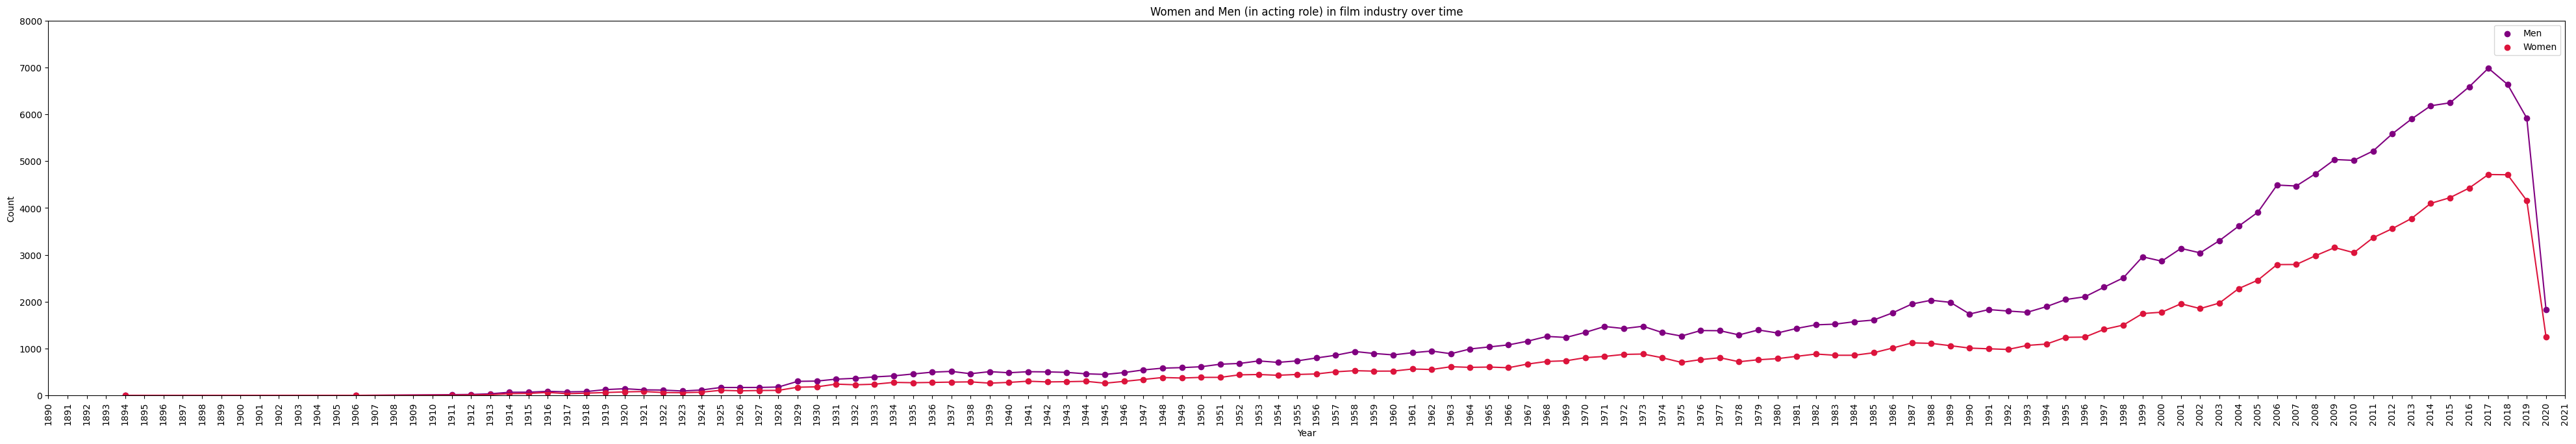

In [294]:
# Using bar graph but data before 1900 is too small to be seen. I change it to line graph.
year_tick = np.arange(1890,2022,step = 1)
plt.figure(figsize=(50,7.5))
plt.xticks(ticks=year_tick,  rotation=90)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Women and Men (in acting role) in film industry over time')
plt.scatter(imdb_actor['year'], imdb_actor['name'], c='purple', marker='o', label='Men')
plt.plot(imdb_actor['year'], imdb_actor['name'], c='purple')
plt.scatter(imdb_actress_a['year'], imdb_actress_a['name'], c='crimson', marker='o', label='Women')
plt.plot(imdb_actress_a['year'], imdb_actress_a['name'], c='crimson')
plt.legend()
plt.axis([1890, 2021, 0, 8000])

## Academy award

### Actress

In [295]:
oscar_actress = oscar[ oscar['category'].str.upper().str.contains('ACTRESS')]
oscar_actress_win = oscar_actress.groupby('name').agg({'awarded': 'sum'}).reset_index()
oscar_actress_nom = oscar_actress.groupby('name').agg({'awarded': 'count'}).reset_index()

In [296]:
oscar_actress_win = oscar_actress_win.sort_values(by='awarded', ascending=False)
oscar_actress_nom = oscar_actress_nom.sort_values(by='awarded', ascending=False)

In [297]:
oscar_actress_name = pd.merge(left=oscar_actress_nom, right=oscar_actress_win, left_on='name', right_on='name', how='left')
oscar_actress_name.columns = ['name', 'nominated', 'awarded']

Text(0, 0.5, 'Count')

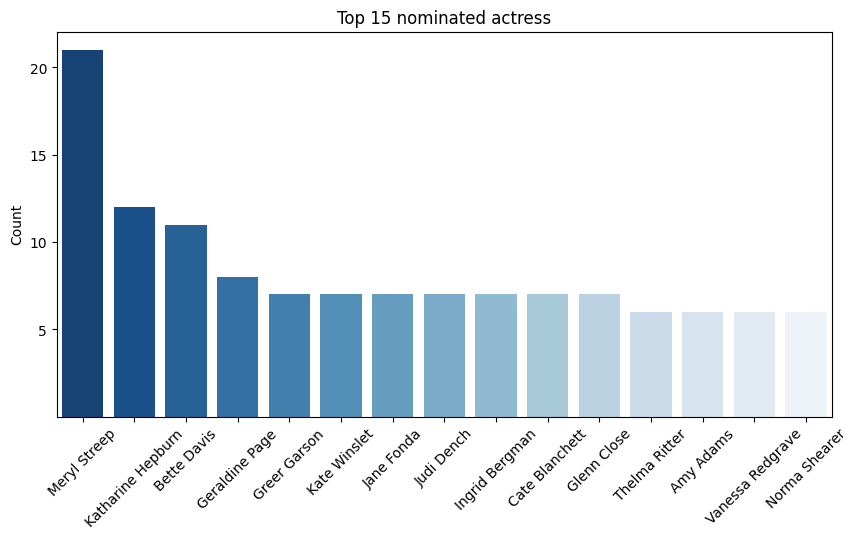

In [298]:
plt.figure(figsize=(10,5))
plt.yticks([5,10,15,20,25])
plt.xticks(rotation=45)
plt.title('Top 15 nominated actress')
sns.barplot(x="name", y="nominated", data=oscar_actress_name.head(15), palette="Blues_r")
plt.xlabel('')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

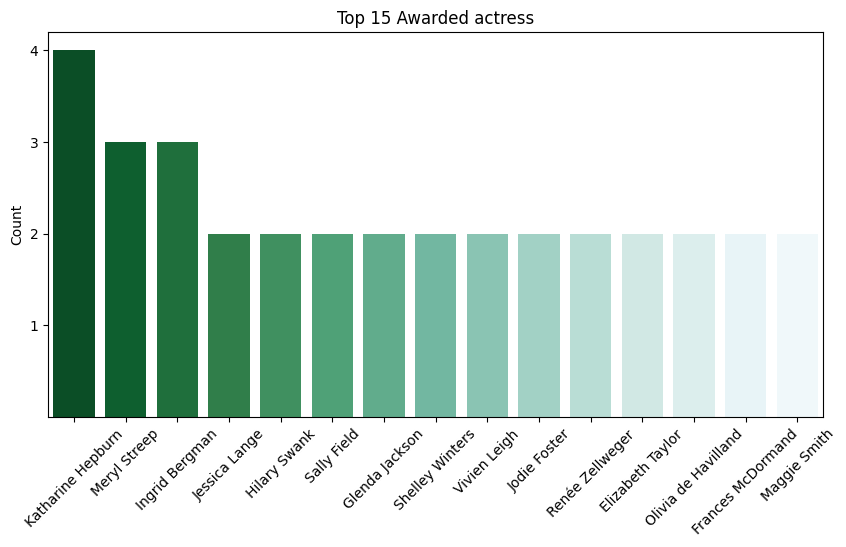

In [299]:
plt.figure(figsize=(10,5))
plt.yticks([1,2,3,4,5])
plt.xticks(rotation=45)
plt.title('Top 15 Awarded actress')
sns.barplot(x="name", y="awarded", data=oscar_actress_name.sort_values(by='awarded', ascending=False).head(15), palette="BuGn_r")
plt.xlabel('')
plt.ylabel('Count')

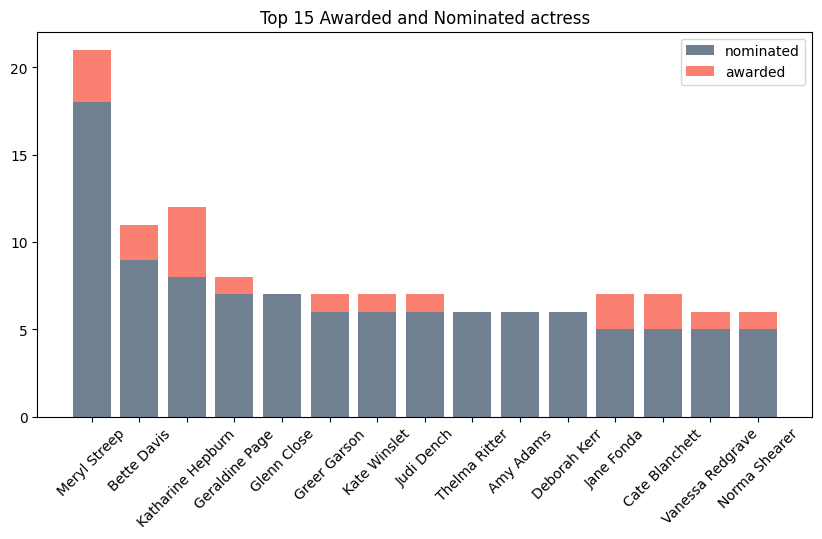

In [300]:
tmp_stack = oscar_actress_name.loc[:,:]
tmp_stack['nom_only'] = tmp_stack['nominated'] - tmp_stack['awarded']
tmp_stack = tmp_stack.sort_values(by=['nom_only','awarded'], ascending=False)

plt.figure(figsize=(10,5))
plt.yticks([0,5,10,15,20,25])
plt.xticks(rotation=45)
plt.bar(data=tmp_stack.head(15), x='name', height='nom_only', label = 'nominated', color='slategrey')
plt.bar(data=tmp_stack.head(15), x='name', height='awarded', bottom = 'nom_only', label = 'win', color='salmon')
plt.title('Top 15 Awarded and Nominated actress')
plt.legend(['nominated', 'awarded'])

Text(0, 0.5, 'Probability')

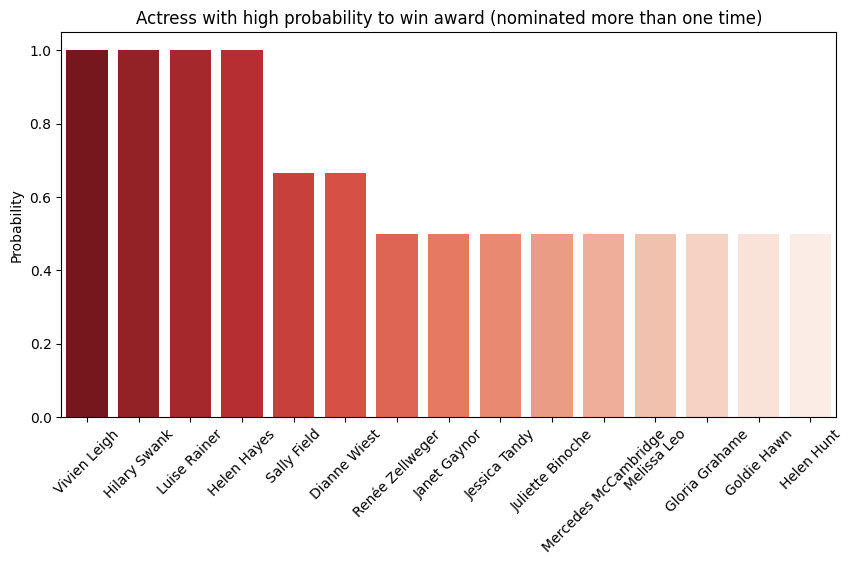

In [301]:
tmp_stack['prob'] = tmp_stack['awarded']/tmp_stack['nominated']
tmp_stack = tmp_stack[tmp_stack['nominated'] > 1].sort_values(by='prob', ascending=False)

plt.figure(figsize=(10,5))
# plt.yticks([0,1,2])
plt.xticks(rotation=45)
plt.title('Actress with high probability to win award (nominated more than one time)')
sns.barplot(x="name", y="prob", data=tmp_stack.head(15), palette="Reds_r")
plt.xlabel('')
plt.ylabel('Probability')

### Actor

In [302]:
oscar_actor = oscar[ oscar['category'].str.upper().str.contains('ACTOR')]
oscar_actor_win = oscar_actor.groupby('name').agg({'awarded': 'sum'}).reset_index()
oscar_actor_nom = oscar_actor.groupby('name').agg({'awarded': 'count'}).reset_index()

In [303]:
oscar_actor_win = oscar_actor_win.sort_values(by='awarded', ascending=False)
oscar_actor_nom = oscar_actor_nom.sort_values(by='awarded', ascending=False)

In [304]:
oscar_actor_name = pd.merge(left=oscar_actor_nom, right=oscar_actor_win, left_on='name', right_on='name', how='left')
oscar_actor_name.columns = ['name', 'nominated', 'awarded']

Text(0, 0.5, 'Count')

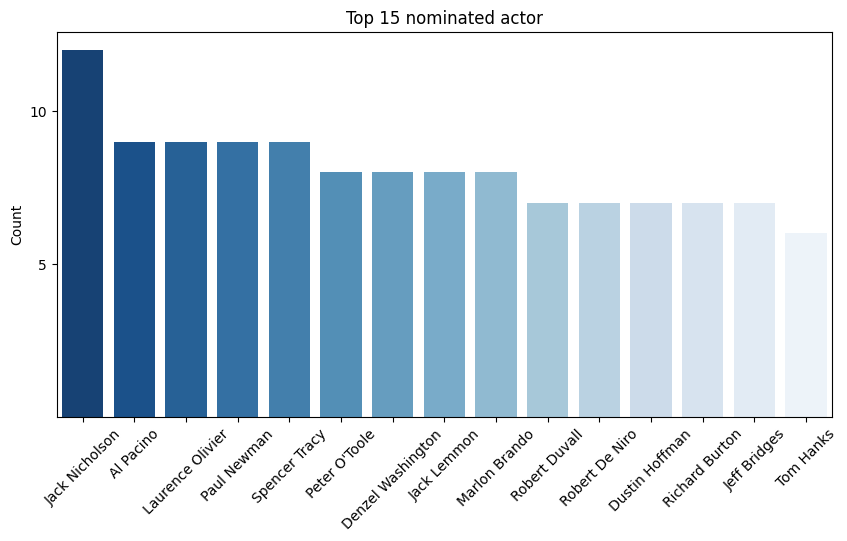

In [305]:
plt.figure(figsize=(10,5))
plt.yticks([5,10,15,20,25])
plt.xticks(rotation=45)
plt.title('Top 15 nominated actor')
sns.barplot(x="name", y="nominated", data=oscar_actor_name.head(15), palette="Blues_r")
plt.xlabel('')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

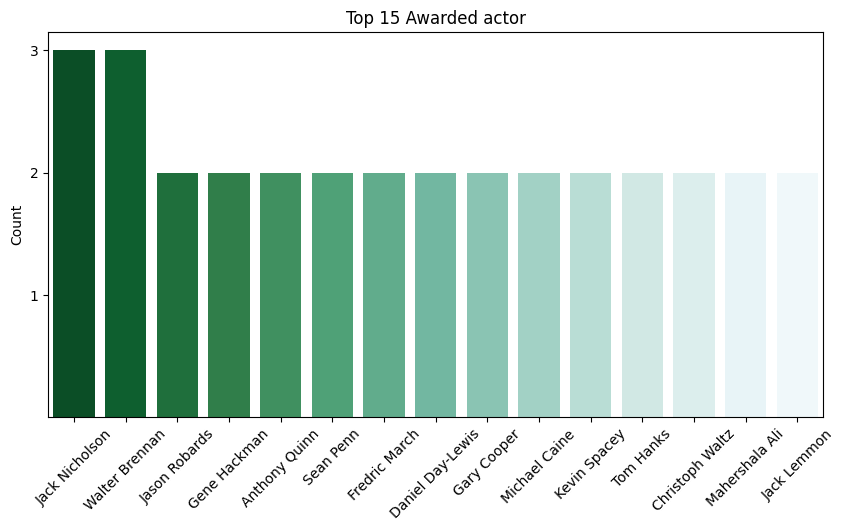

In [306]:
plt.figure(figsize=(10,5))
plt.yticks([1,2,3,4,5])
plt.xticks(rotation=45)
plt.title('Top 15 Awarded actor')
sns.barplot(x="name", y="awarded", data=oscar_actor_name.sort_values(by='awarded', ascending=False).head(15), palette="BuGn_r")
plt.xlabel('')
plt.ylabel('Count')

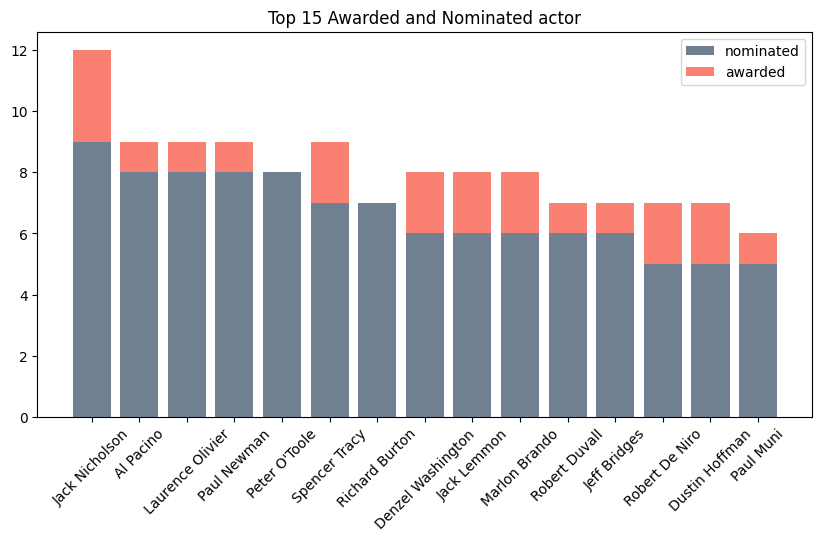

In [307]:
tmp_stack = oscar_actor_name.loc[:,:]
tmp_stack['nom_only'] = tmp_stack['nominated'] - tmp_stack['awarded']
tmp_stack = tmp_stack.sort_values(by=['nom_only','awarded'], ascending=False)

plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.bar(data=tmp_stack.head(15), x='name', height='nom_only', label = 'nominated', color='slategrey')
plt.bar(data=tmp_stack.head(15), x='name', height='awarded', bottom = 'nom_only', label = 'win', color='salmon')
plt.title('Top 15 Awarded and Nominated actor')
plt.legend(['nominated', 'awarded'])

Text(0, 0.5, 'Probability')

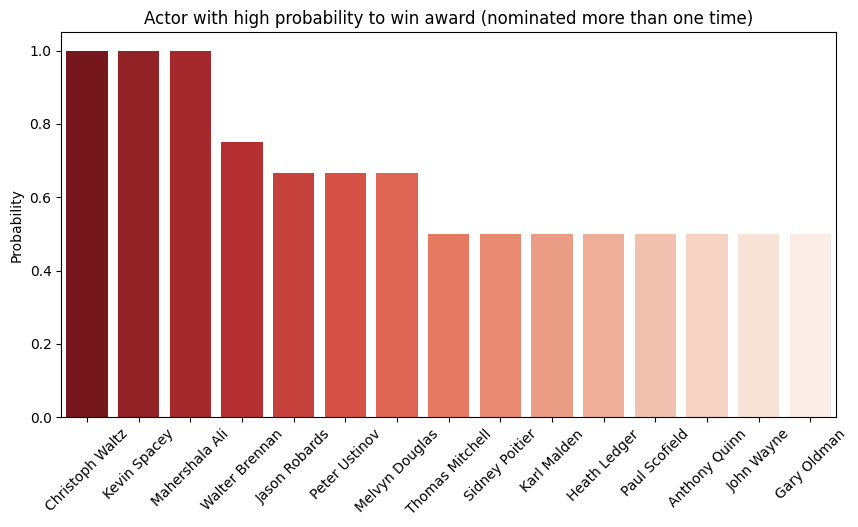

In [308]:
tmp_stack['prob'] = tmp_stack['awarded']/tmp_stack['nominated']
tmp_stack = tmp_stack[tmp_stack['nominated'] > 1].sort_values(by='prob', ascending=False)

plt.figure(figsize=(10,5))
# plt.yticks([0,1,2])
plt.xticks(rotation=45)
plt.title('Actor with high probability to win award (nominated more than one time)')
sns.barplot(x="name", y="prob", data=tmp_stack.head(15), palette="Reds_r")
plt.xlabel('')
plt.ylabel('Probability')

### Director

In [309]:
oscar_dir = oscar[ oscar['category'].str.upper().str.contains('DIRECTING')]
oscar_dir_win = oscar_dir.groupby('name').agg({'awarded': 'sum'}).reset_index()
oscar_dir_nom = oscar_dir.groupby('name').agg({'awarded': 'count'}).reset_index()

In [310]:
oscar_dir_win = oscar_dir_win.sort_values(by='awarded', ascending=False)
oscar_dir_nom = oscar_dir_nom.sort_values(by='awarded', ascending=False)

In [311]:
oscar_dir_name = pd.merge(left=oscar_dir_nom, right=oscar_dir_win, left_on='name', right_on='name', how='left')
oscar_dir_name.columns = ['name', 'nominated', 'awarded']

Text(0, 0.5, 'Count')

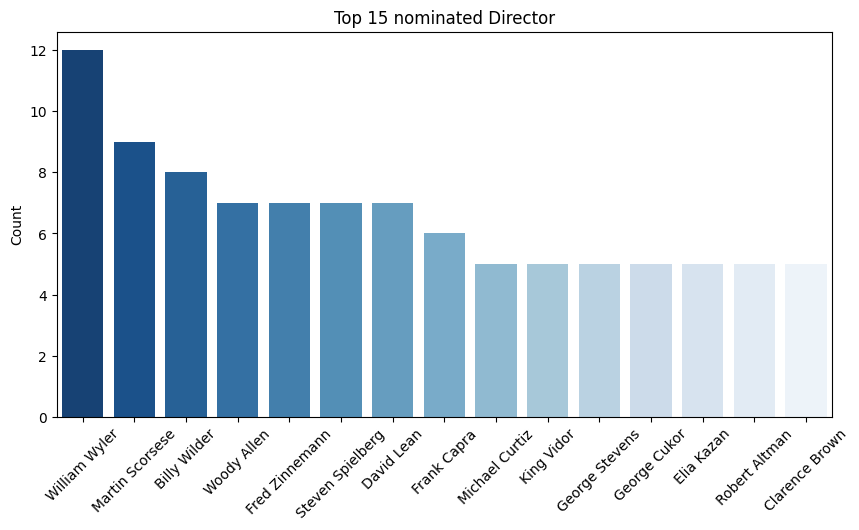

In [312]:
plt.figure(figsize=(10,5))
# plt.yticks([5,10,15,20,25])
plt.xticks(rotation=45)
plt.title('Top 15 nominated Director')
sns.barplot(x="name", y="nominated", data=oscar_dir_name.head(15), palette="Blues_r")
plt.xlabel('')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

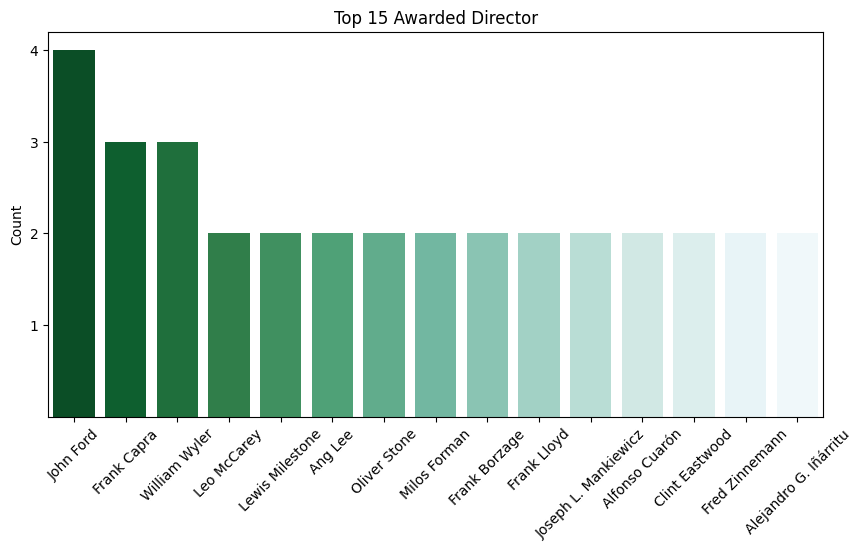

In [313]:
plt.figure(figsize=(10,5))
plt.yticks([1,2,3,4,5])
plt.xticks(rotation=45)
plt.title('Top 15 Awarded Director')
sns.barplot(x="name", y="awarded", data=oscar_dir_name.sort_values(by='awarded', ascending=False).head(15), palette="BuGn_r")
plt.xlabel('')
plt.ylabel('Count')

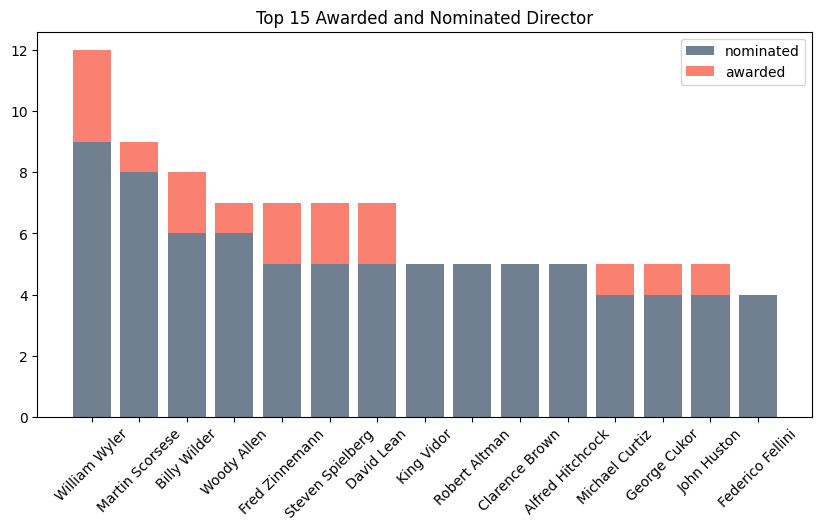

In [314]:
tmp_stack = oscar_dir_name.loc[:,:]
tmp_stack['nom_only'] = tmp_stack['nominated'] - tmp_stack['awarded']
tmp_stack = tmp_stack.sort_values(by=['nom_only','awarded'], ascending=False)

plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.bar(data=tmp_stack.head(15), x='name', height='nom_only', label = 'nominated', color='slategrey')
plt.bar(data=tmp_stack.head(15), x='name', height='awarded', bottom = 'nom_only', label = 'win', color='salmon')
plt.title('Top 15 Awarded and Nominated Director')
plt.legend(['nominated', 'awarded'])

Text(0, 0.5, 'Probability')

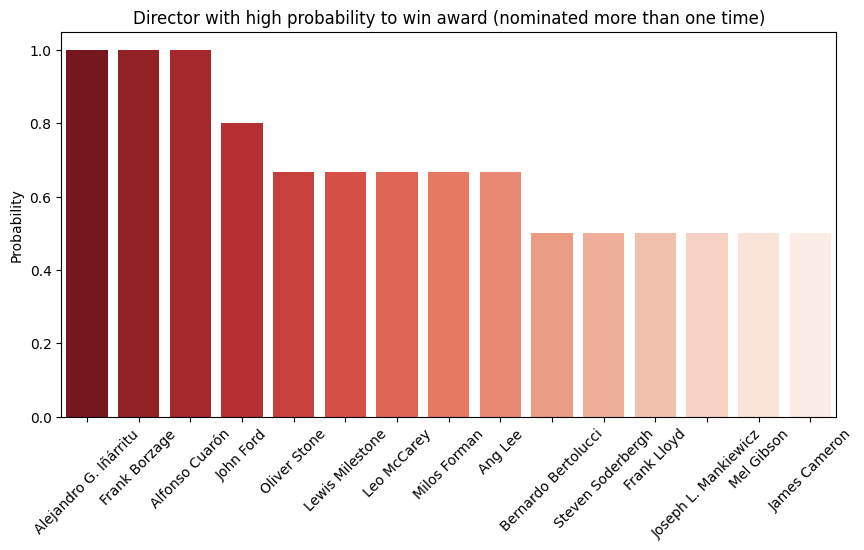

In [315]:
tmp_stack['prob'] = tmp_stack['awarded']/tmp_stack['nominated']
tmp_stack = tmp_stack[tmp_stack['nominated'] > 1].sort_values(by='prob', ascending=False)

plt.figure(figsize=(10,5))
# plt.yticks([0,1,2])
plt.xticks(rotation=45)
plt.title('Director with high probability to win award (nominated more than one time)')
sns.barplot(x="name", y="prob", data=tmp_stack.head(15), palette="Reds_r")
plt.xlabel('')
plt.ylabel('Probability')

### Writer

In [316]:
oscar_wri = oscar[ oscar['category'].str.upper().str.contains('WRITING')]
oscar_wri_win = oscar_wri.groupby('name').agg({'awarded': 'sum'}).reset_index()
oscar_wri_nom = oscar_wri.groupby('name').agg({'awarded': 'count'}).reset_index()

In [317]:
oscar_wri_win = oscar_wri_win.sort_values(by='awarded', ascending=False)
oscar_wri_nom = oscar_wri_nom.sort_values(by='awarded', ascending=False)

In [318]:
oscar_wri_name = pd.merge(left=oscar_wri_nom, right=oscar_wri_win, left_on='name', right_on='name', how='left')
oscar_wri_name.columns = ['name', 'nominated', 'awarded']

Text(0, 0.5, 'Count')

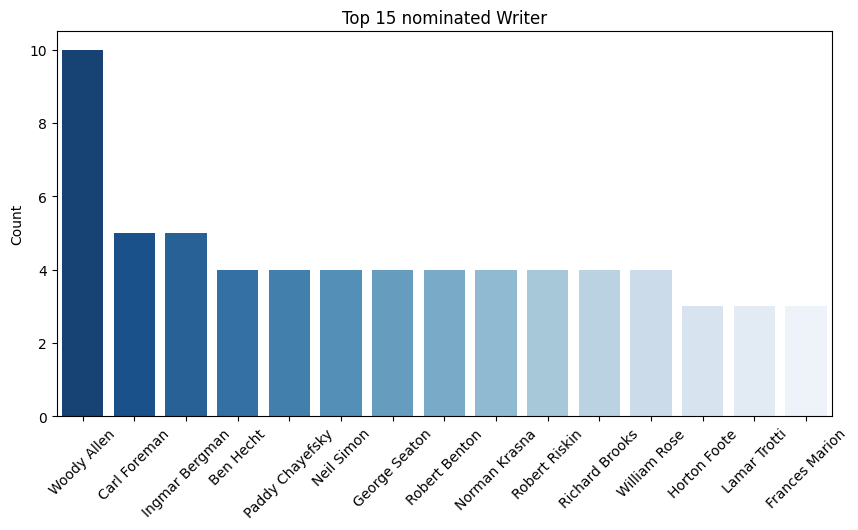

In [319]:
plt.figure(figsize=(10,5))
# plt.yticks([5,10,15,20,25])
plt.xticks(rotation=45)
plt.title('Top 15 nominated Writer')
sns.barplot(x="name", y="nominated", data=oscar_wri_name.head(15), palette="Blues_r")
plt.xlabel('')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

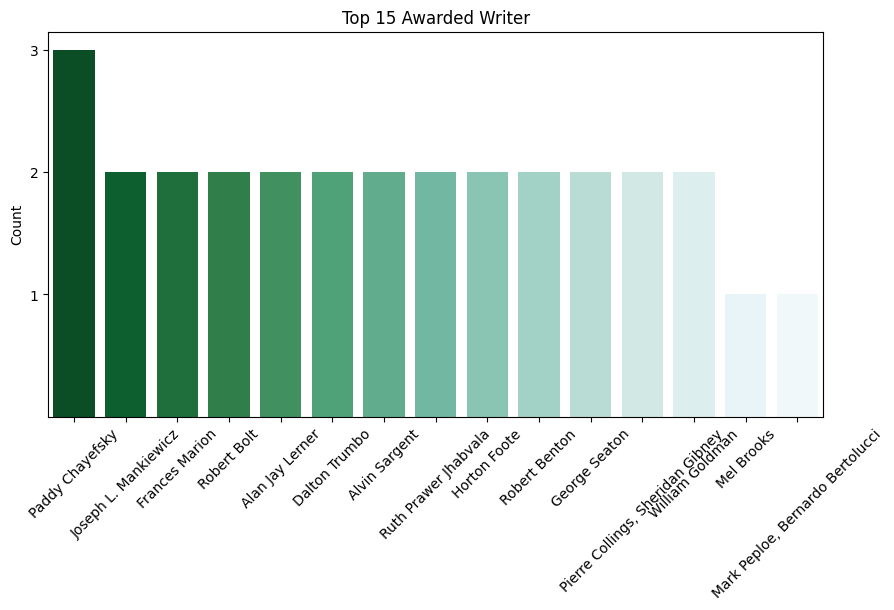

In [320]:
plt.figure(figsize=(10,5))
plt.yticks([1,2,3,4,5])
plt.xticks(rotation=45)
plt.title('Top 15 Awarded Writer')
sns.barplot(x="name", y="awarded", data=oscar_wri_name.sort_values(by='awarded', ascending=False).head(15), palette="BuGn_r")
plt.xlabel('')
plt.ylabel('Count')

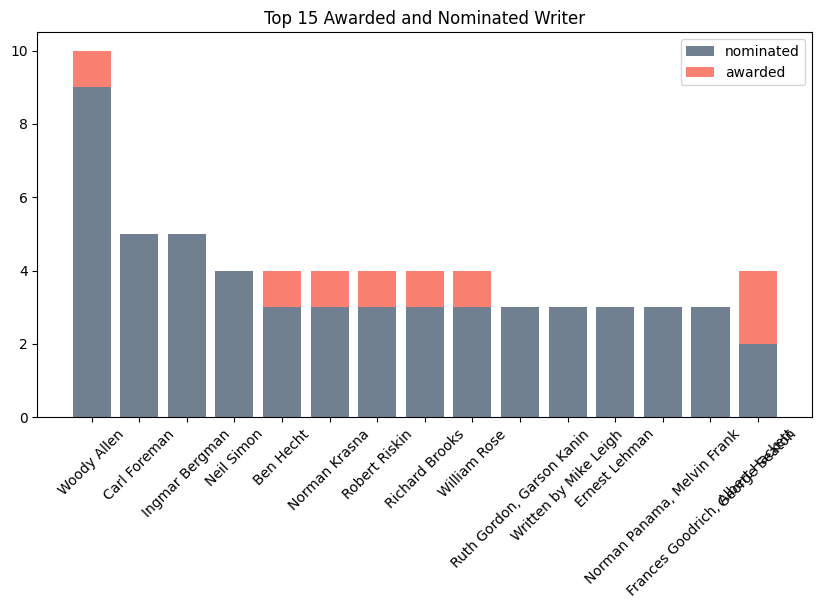

In [321]:
tmp_stack = oscar_wri_name.loc[:,:]
tmp_stack['nom_only'] = tmp_stack['nominated'] - tmp_stack['awarded']
tmp_stack = tmp_stack.sort_values(by=['nom_only','awarded'], ascending=False)

plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.bar(data=tmp_stack.head(15), x='name', height='nom_only', label = 'nominated', color='slategrey')
plt.bar(data=tmp_stack.head(15), x='name', height='awarded', bottom = 'nom_only', label = 'win', color='salmon')
plt.title('Top 15 Awarded and Nominated Writer')
plt.legend(['nominated', 'awarded'])

Text(0, 0.5, 'Probability')

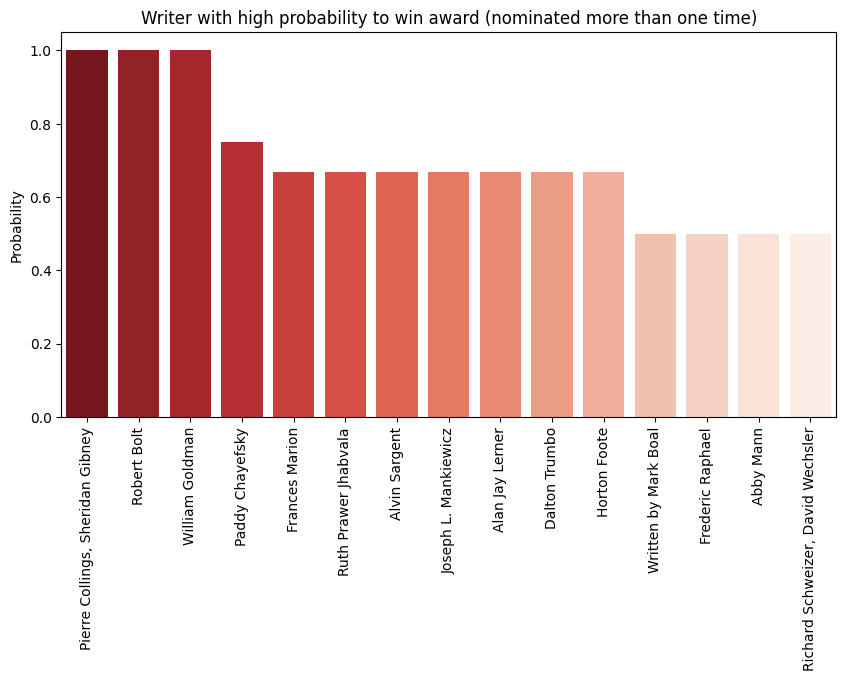

In [322]:
tmp_stack['prob'] = tmp_stack['awarded']/tmp_stack['nominated']
tmp_stack = tmp_stack[tmp_stack['nominated'] > 1].sort_values(by='prob', ascending=False)

plt.figure(figsize=(10,5))
# plt.yticks([0,1,2])
plt.xticks(rotation=90)
plt.title('Writer with high probability to win award (nominated more than one time)')
sns.barplot(x="name", y="prob", data=tmp_stack.head(15), palette="Reds_r")
plt.xlabel('')
plt.ylabel('Probability')

## IMDB and Metascore and Rotten

### Actress

In [323]:
# Find average 
meryl_streep = imdb_film_crew[imdb_film_crew['name'].str.contains('Meryl Streep')].groupby('name').agg({'film_year': 'nunique', 'imdbscore': 'mean', 'metascore': 'mean', 'director': 'nunique'})
meryl_streep


film_year  imdbscore  metascore  director
name                                                   
Meryl Streep         49   6.704082  62.714286        42

In [324]:
france_mc = imdb_film_crew[imdb_film_crew['name'].str.contains('Frances McDormand')].groupby('name').agg({'film_year': 'nunique', 'imdbscore': 'mean', 'metascore': 'mean', 'director': 'nunique'})
france_mc

film_year  imdbscore  metascore  director
name                                                        
Frances McDormand         26   6.773077      65.25        24

In [325]:
sally_f = imdb_film_crew[imdb_film_crew['name'].str.contains('Sally Field')].groupby('name').agg({'film_year': 'nunique', 'imdbscore': 'mean', 'metascore': 'mean', 'director': 'nunique'})
sally_f

film_year  imdbscore  metascore  director
name                                                  
Sally Field         30       6.44  53.409091        27

Text(0.5, 1.0, '')

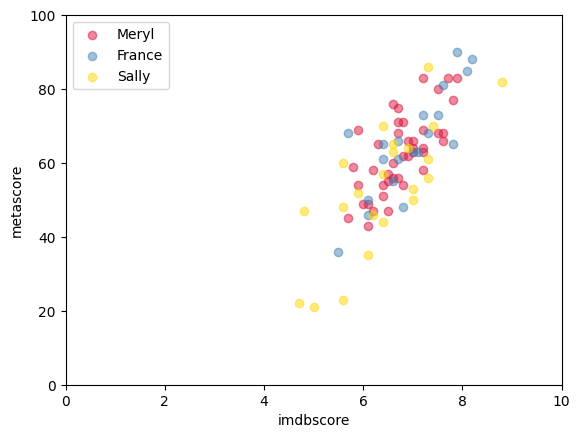

In [326]:
plt.scatter(data=imdb_film_crew[imdb_film_crew['name'].str.contains('Meryl Streep')], x='imdbscore', y='metascore', alpha = 0.5, color='crimson')
plt.scatter(data=imdb_film_crew[imdb_film_crew['name'].str.contains('Frances McDormand')], x='imdbscore', y='metascore', alpha = 0.5, color='steelblue')
plt.scatter(data=imdb_film_crew[imdb_film_crew['name'].str.contains('Sally Field')], x='imdbscore', y='metascore', alpha = 0.5, color='gold')
plt.axis([0,10,0,100])
plt.legend(['Meryl', 'France', 'Sally'])
plt.xlabel('imdbscore')
plt.ylabel('metascore')
plt.title('')

Text(0.5, 1.0, '')

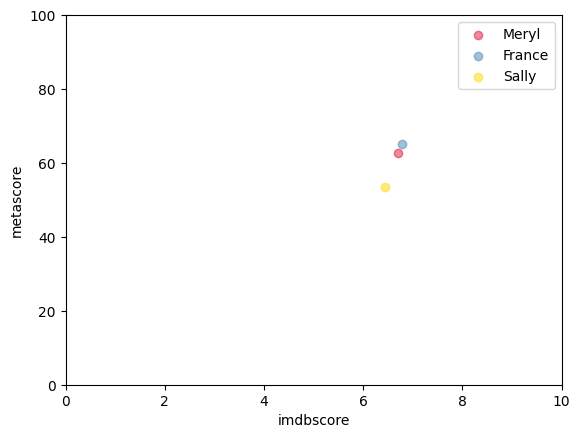

In [327]:
plt.scatter(data=meryl_streep, x='imdbscore', y='metascore', alpha = 0.5, color='crimson')
plt.scatter(data=france_mc, x='imdbscore', y='metascore', alpha = 0.5, color='steelblue')
plt.scatter(data=sally_f, x='imdbscore', y='metascore', alpha = 0.5, color='gold')
plt.axis([0,10,0,100])
plt.legend(['Meryl', 'France', 'Sally'])
plt.xlabel('imdbscore')
plt.ylabel('metascore')
plt.title('')

### Actor

In [328]:
# Find average 
jack_n = imdb_film_crew[imdb_film_crew['name'].str.contains('Jack Nicholson')].groupby('name').agg({'film_year': 'nunique', 'imdbscore': 'mean', 'metascore': 'mean', 'director': 'nunique'})
jack_n


film_year  imdbscore  metascore  director
name                                                     
Jack Nicholson         52   6.438462       67.0        33

In [329]:
pacino = imdb_film_crew[imdb_film_crew['name'].str.contains('Al Pacino')].groupby('name').agg({'film_year': 'nunique', 'imdbscore': 'mean', 'metascore': 'mean', 'director': 'nunique'})
pacino

film_year  imdbscore  metascore  director
name                                                
Al Pacino         46   6.784783  59.073171        36

In [330]:
christoph = imdb_film_crew[imdb_film_crew['name'].str.contains('Christoph Waltz')].groupby('name').agg({'film_year': 'nunique', 'imdbscore': 'mean', 'metascore': 'mean', 'director': 'nunique'})
christoph

film_year  imdbscore  metascore  director
name                                                      
Christoph Waltz         15   6.466667  55.545455        15

Text(0.5, 1.0, '')

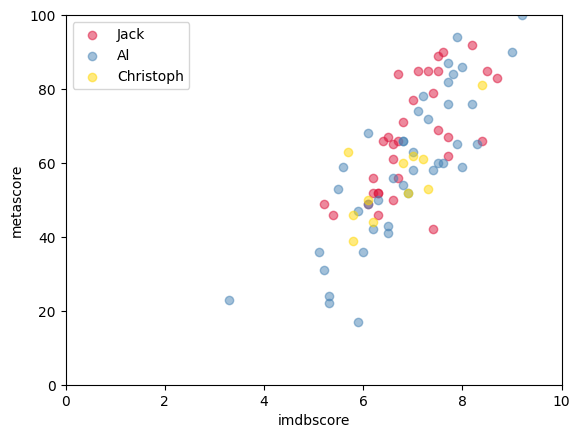

In [331]:
plt.scatter(data=imdb_film_crew[imdb_film_crew['name'].str.contains('Jack Nicholson')], x='imdbscore', y='metascore', alpha = 0.5, color='crimson')
plt.scatter(data=imdb_film_crew[imdb_film_crew['name'].str.contains('Al Pacino')], x='imdbscore', y='metascore', alpha = 0.5, color='steelblue')
plt.scatter(data=imdb_film_crew[imdb_film_crew['name'].str.contains('Christoph Waltz')], x='imdbscore', y='metascore', alpha = 0.5, color='gold')
plt.axis([0,10,0,100])
plt.legend(['Jack', 'Al', 'Christoph'])
plt.xlabel('imdbscore')
plt.ylabel('metascore')
plt.title('')

Text(0.5, 1.0, '')

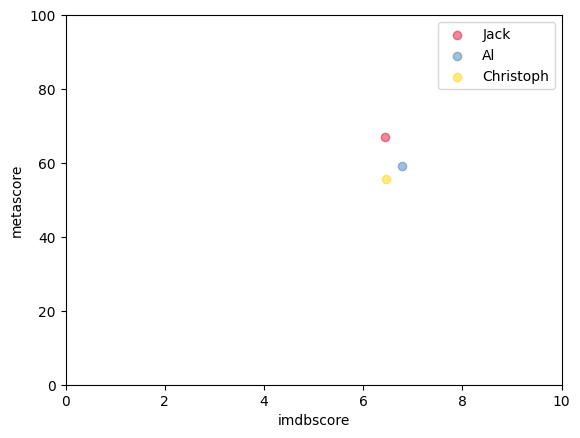

In [332]:
plt.scatter(data=jack_n, x='imdbscore', y='metascore', alpha = 0.5, color='crimson')
plt.scatter(data=pacino, x='imdbscore', y='metascore', alpha = 0.5, color='steelblue')
plt.scatter(data=christoph, x='imdbscore', y='metascore', alpha = 0.5, color='gold')
plt.axis([0,10,0,100])
plt.legend(['Jack', 'Al', 'Christoph'])
plt.xlabel('imdbscore')
plt.ylabel('metascore')
plt.title('')

### Director

In [333]:
# Find average 
ang_lee = imdb_film_crew[imdb_film_crew['name'].str.contains('Ang Lee')].groupby('name').agg({'film_year': 'nunique', 'imdbscore': 'mean', 'metascore': 'mean', 'director': 'nunique'})
ang_lee


film_year  imdbscore  metascore  director
name                                              
Ang Lee         16     7.0875       67.0         3

In [334]:
scorsese = imdb_film_crew[imdb_film_crew['name'].str.contains('Martin Scorsese')].groupby('name').agg({'film_year': 'nunique', 'imdbscore': 'mean', 'metascore': 'mean', 'director': 'nunique'})
scorsese

film_year  imdbscore  metascore  director
name                                                      
Martin Scorsese         31   7.341935  77.758621         7

In [335]:
alejandro = imdb_film_crew[imdb_film_crew['name'].str.contains('Alejandro G. Iñárritu')].groupby('name').agg({'film_year': 'nunique', 'imdbscore': 'mean', 'metascore': 'mean', 'director': 'nunique'})
alejandro

film_year  imdbscore  metascore  director
name                                                            
Alejandro G. Iñárritu          8     7.5125     71.375         3

Text(0.5, 1.0, '')

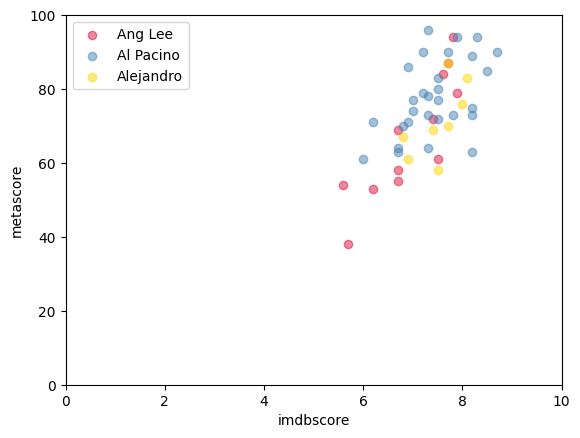

In [336]:
plt.scatter(data=imdb_film_crew[imdb_film_crew['name'].str.contains('Ang Lee')], x='imdbscore', y='metascore', alpha = 0.5, color='crimson')
plt.scatter(data=imdb_film_crew[imdb_film_crew['name'].str.contains('Martin Scorsese')], x='imdbscore', y='metascore', alpha = 0.5, color='steelblue')
plt.scatter(data=imdb_film_crew[imdb_film_crew['name'].str.contains('Alejandro G. Iñárritu')], x='imdbscore', y='metascore', alpha = 0.5, color='gold')
plt.axis([0,10,0,100])
plt.legend(['Ang Lee', 'Al Pacino', 'Alejandro'])
plt.xlabel('imdbscore')
plt.ylabel('metascore')
plt.title('')

Text(0.5, 1.0, '')

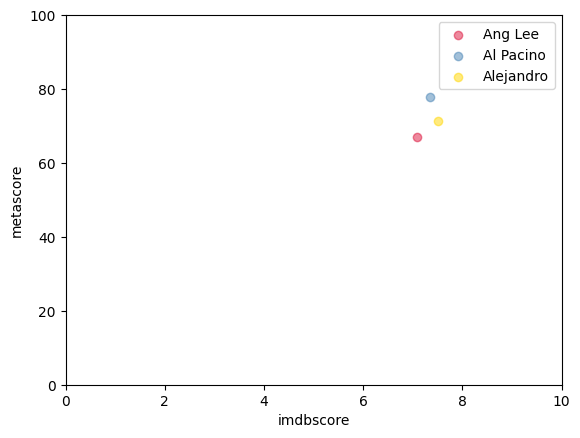

In [337]:
plt.scatter(data=ang_lee, x='imdbscore', y='metascore', alpha = 0.5, color='crimson')
plt.scatter(data=scorsese, x='imdbscore', y='metascore', alpha = 0.5, color='steelblue')
plt.scatter(data=alejandro, x='imdbscore', y='metascore', alpha = 0.5, color='gold')
plt.axis([0,10,0,100])
plt.legend(['Ang Lee', 'Al Pacino', 'Alejandro'])
plt.xlabel('imdbscore')
plt.ylabel('metascore')
plt.title('')

### Writer

In [338]:
# Find average 
woody_a = imdb_film_crew[imdb_film_crew['name'].str.contains('Woody Allen')].groupby('name').agg({'film_year': 'nunique', 'imdbscore': 'mean', 'metascore': 'mean', 'director': 'nunique'})
woody_a


film_year  imdbscore  metascore  director
name                                                  
Woody Allen         60      6.865  64.214286        14

In [339]:
robert_b = imdb_film_crew[imdb_film_crew['name'].str.contains('Robert Benton')].groupby('name').agg({'film_year': 'nunique', 'imdbscore': 'mean', 'metascore': 'mean', 'director': 'nunique'})
robert_b

film_year  imdbscore  metascore  director
name                                                    
Robert Benton         16        6.7       66.5         6

In [340]:
mark_b = imdb_film_crew[imdb_film_crew['name'].str.contains('Mark Boal')].groupby('name').agg({'film_year': 'nunique', 'imdbscore': 'mean', 'metascore': 'mean', 'director': 'nunique'})
mark_b

film_year  imdbscore  metascore  director
name                                                
Mark Boal          5       7.16       78.6         3

Text(0.5, 1.0, '')

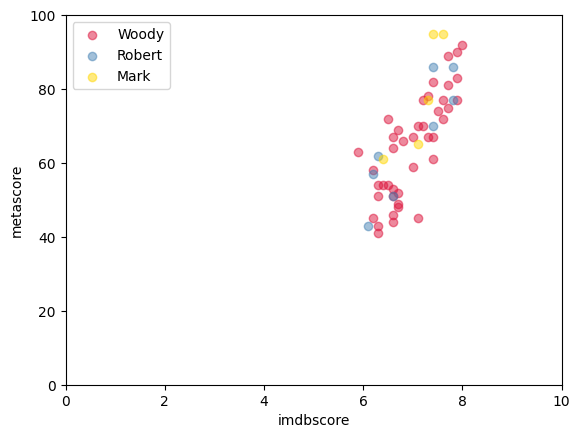

In [341]:
plt.scatter(data=imdb_film_crew[imdb_film_crew['name'].str.contains('Woody Allen')], x='imdbscore', y='metascore', alpha = 0.5, color='crimson')
plt.scatter(data=imdb_film_crew[imdb_film_crew['name'].str.contains('Robert Benton')], x='imdbscore', y='metascore', alpha = 0.5, color='steelblue')
plt.scatter(data=imdb_film_crew[imdb_film_crew['name'].str.contains('Mark Boal')], x='imdbscore', y='metascore', alpha = 0.5, color='gold')
plt.axis([0,10,0,100])
plt.legend(['Woody', 'Robert', 'Mark'])
plt.xlabel('imdbscore')
plt.ylabel('metascore')
plt.title('')

Text(0.5, 1.0, '')

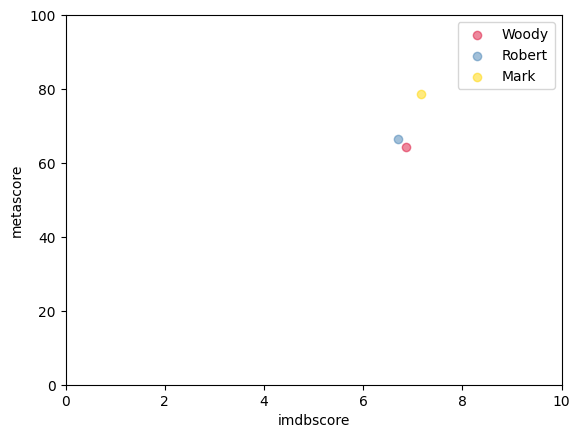

In [342]:
plt.scatter(data=woody_a, x='imdbscore', y='metascore', alpha = 0.5, color='crimson')
plt.scatter(data=robert_b, x='imdbscore', y='metascore', alpha = 0.5, color='steelblue')
plt.scatter(data=mark_b, x='imdbscore', y='metascore', alpha = 0.5, color='gold')
plt.axis([0,10,0,100])
plt.legend(['Woody', 'Robert', 'Mark'])
plt.xlabel('imdbscore')
plt.ylabel('metascore')
plt.title('')

### IMDB/META Genre

Text(0.5, 1.0, 'Scatter plot between 1st genre and 2nd genre')

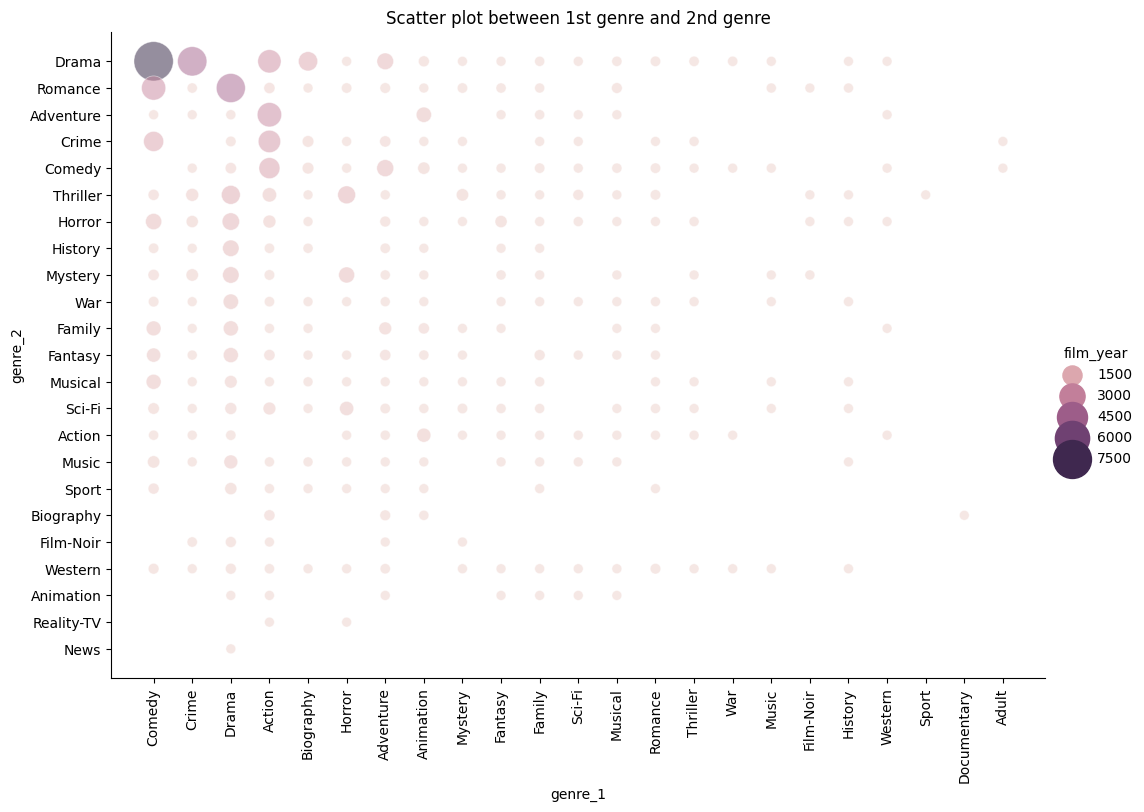

In [343]:
sns.relplot(data=imdb_film.groupby(['genre_1', 'genre_2']).agg({'film_year':'count'}).reset_index().sort_values(by='film_year', ascending=False), kind='scatter', x='genre_1', y='genre_2', 
            hue='film_year', size='film_year', sizes=(50,800), alpha=0.5, height=7, aspect=1.5)
plt.xticks(rotation = 90)
plt.title('Scatter plot between 1st genre and 2nd genre') 

Text(0.5, 1.0, 'Scatter plot between 1st genre and 2nd genre (imdbscore > 7 and metascore > 70)')

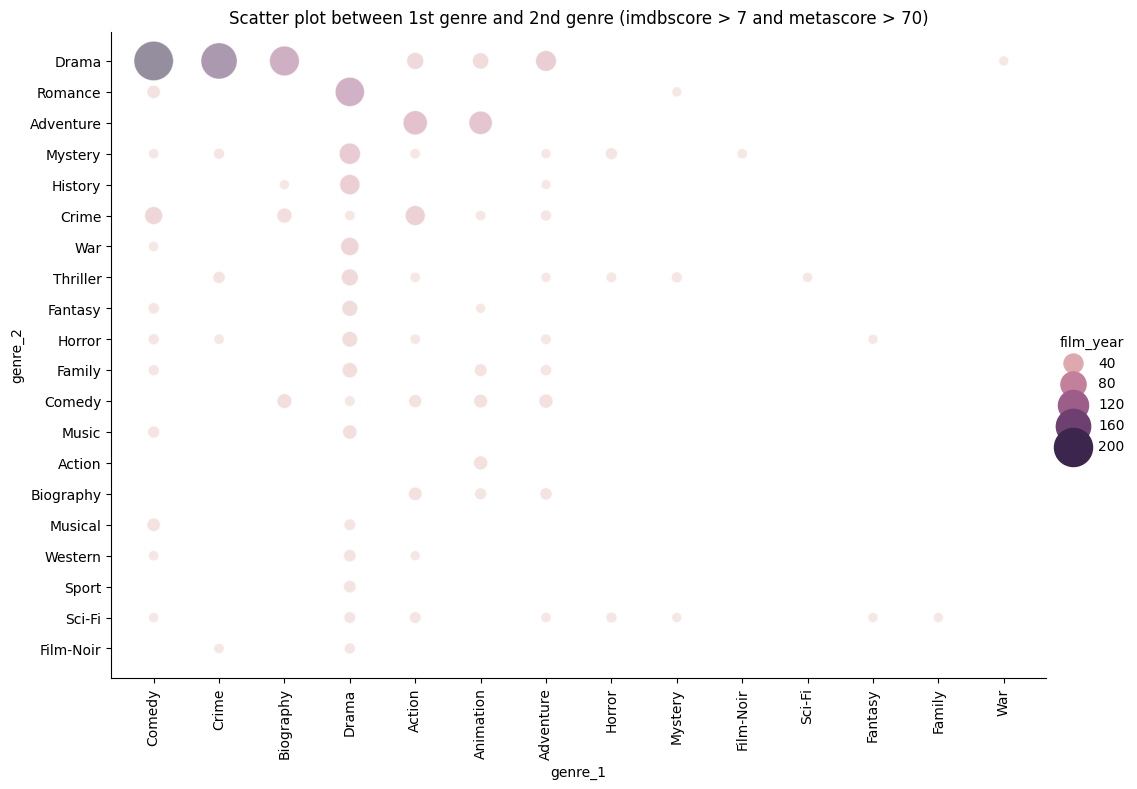

In [344]:
sns.relplot(data=imdb_film[(imdb_film['imdbscore'] > 7) & (imdb_film['metascore'] > 70)].groupby(['genre_1', 'genre_2']).agg({'film_year':'count'}).reset_index().sort_values(by='film_year', ascending=False), kind='scatter', 
            x='genre_1', y='genre_2', hue='film_year', size='film_year', sizes=(50,800), alpha=0.5, height=7, aspect=1.5)
plt.xticks(rotation = 90)
plt.title('Scatter plot between 1st genre and 2nd genre (imdbscore > 7 and metascore > 70)') 

Text(0.5, 1.0, 'Histogram of IMDB score')

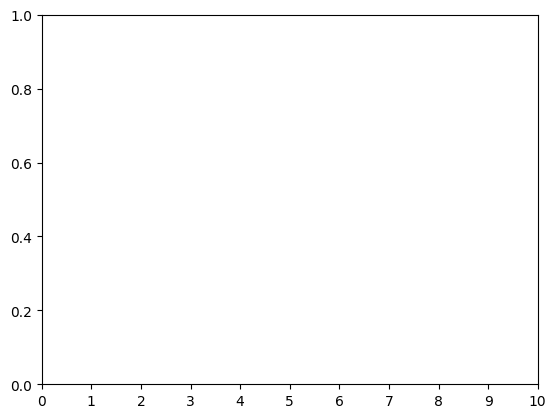

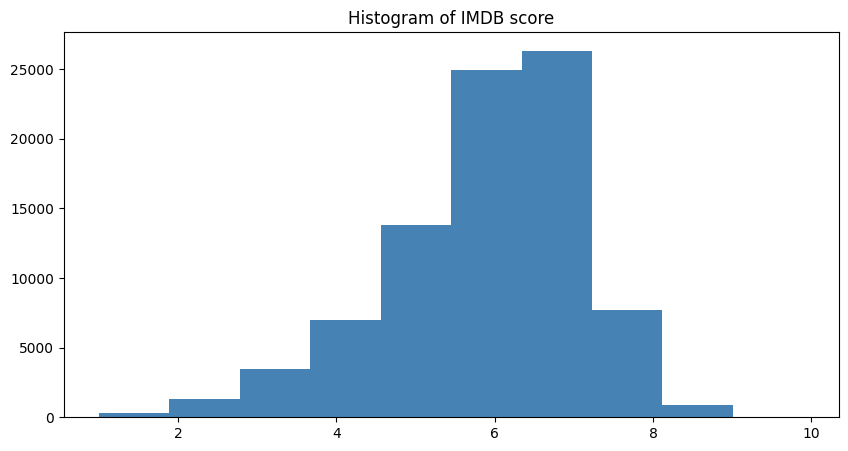

In [345]:
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.figure(figsize=(10,5))
plt.hist(imdb_film['imdbscore'], bins=10, histtype='bar', color='steelblue')
plt.title('Histogram of IMDB score')

Text(0.5, 1.0, 'Histogram of Metascore')

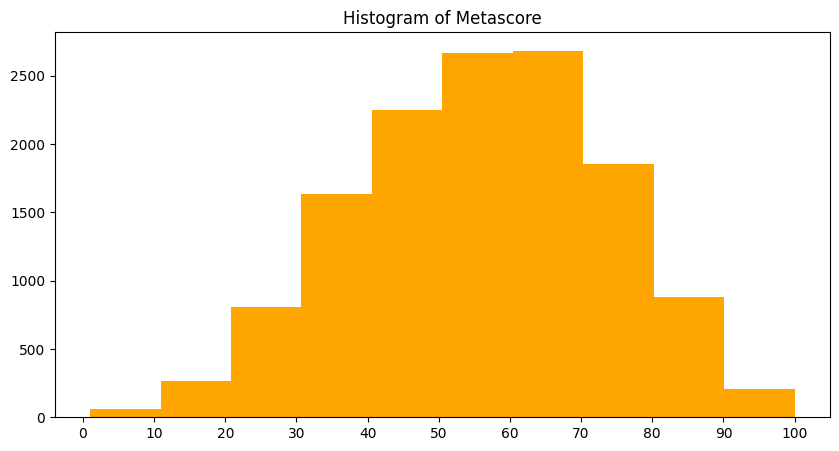

In [346]:
t = np.arange(0,101,10)
plt.figure(figsize=(10,5))
plt.xticks(ticks=t)
plt.hist(imdb_film['metascore'], bins=10, histtype='bar', color='orange')
plt.title('Histogram of Metascore')

Text(0.5, 1.0, 'Histogram of Rotten Tomatoes rating')

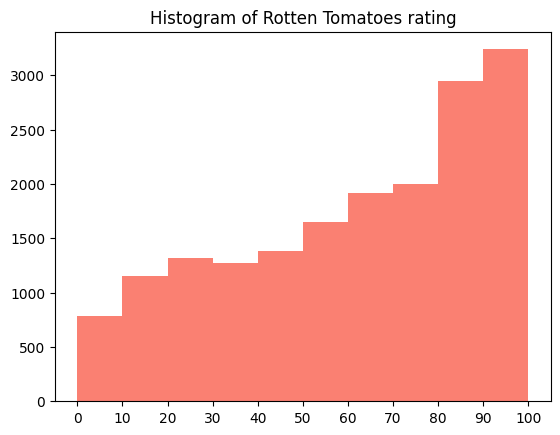

In [347]:
t = np.arange(0,101,10)
# plt.figure(figsize=(10,5))
plt.xticks(ticks=t)
plt.hist(rotten['tomatometer_rating'], bins=10, histtype='bar', color='salmon')
plt.title('Histogram of Rotten Tomatoes rating')

<Figure size 1000x500 with 0 Axes>

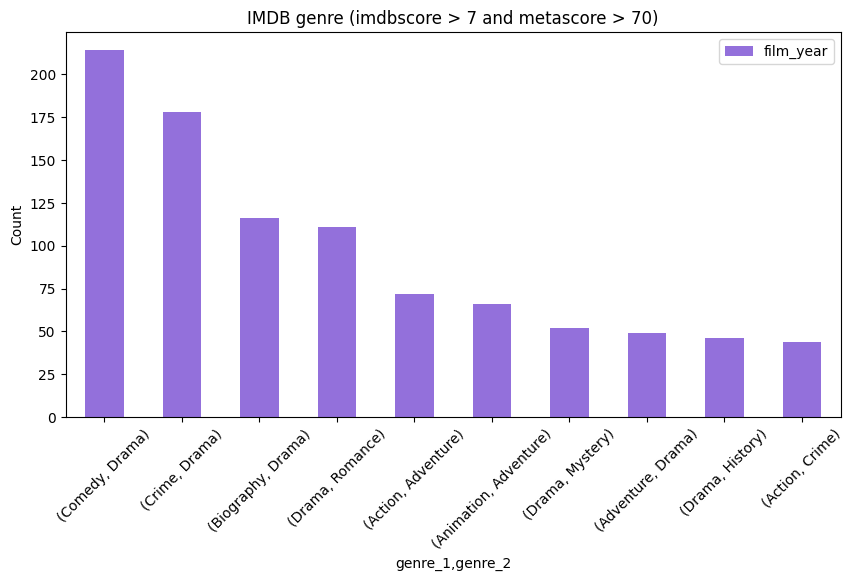

<Figure size 1000x500 with 0 Axes>

In [381]:
# sns.catplot(data=imdb_film.groupby(['genre_1', 'genre_2']).agg({'film_year':'count'}).sort_values(by='film_year', ascending=False).head(10), x='film_year', kind='count')

imdb_film[(imdb_film['imdbscore'] > 7) & (imdb_film['metascore'] > 70)].groupby(['genre_1', 'genre_2']).agg({'film_year':'count'}).sort_values(by='film_year', ascending=False).head(10).plot(kind='bar', width=0.5, color='mediumpurple', figsize=(10,5))
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('IMDB genre (imdbscore > 7 and metascore > 70)')
plt.figure(figsize=(10,5))


<Figure size 1000x500 with 0 Axes>

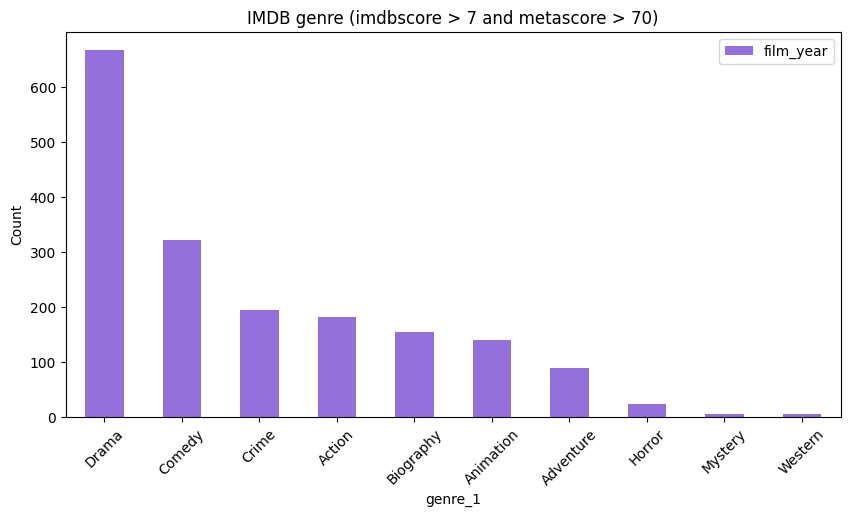

<Figure size 1000x500 with 0 Axes>

In [382]:
imdb_film[(imdb_film['imdbscore'] > 7) & (imdb_film['metascore'] > 70)].groupby('genre_1').agg({'film_year':'count'}).sort_values(by='film_year', ascending=False).head(10).plot(kind='bar', width=0.5, color='mediumpurple', figsize=(10,5))
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('IMDB genre (imdbscore > 7 and metascore > 70)')
plt.figure(figsize=(10,5))


### Rotten Genre

Text(0.5, 1.0, 'Scatter plot between 1st genre and 2nd genre : Rotten Tomatoes')

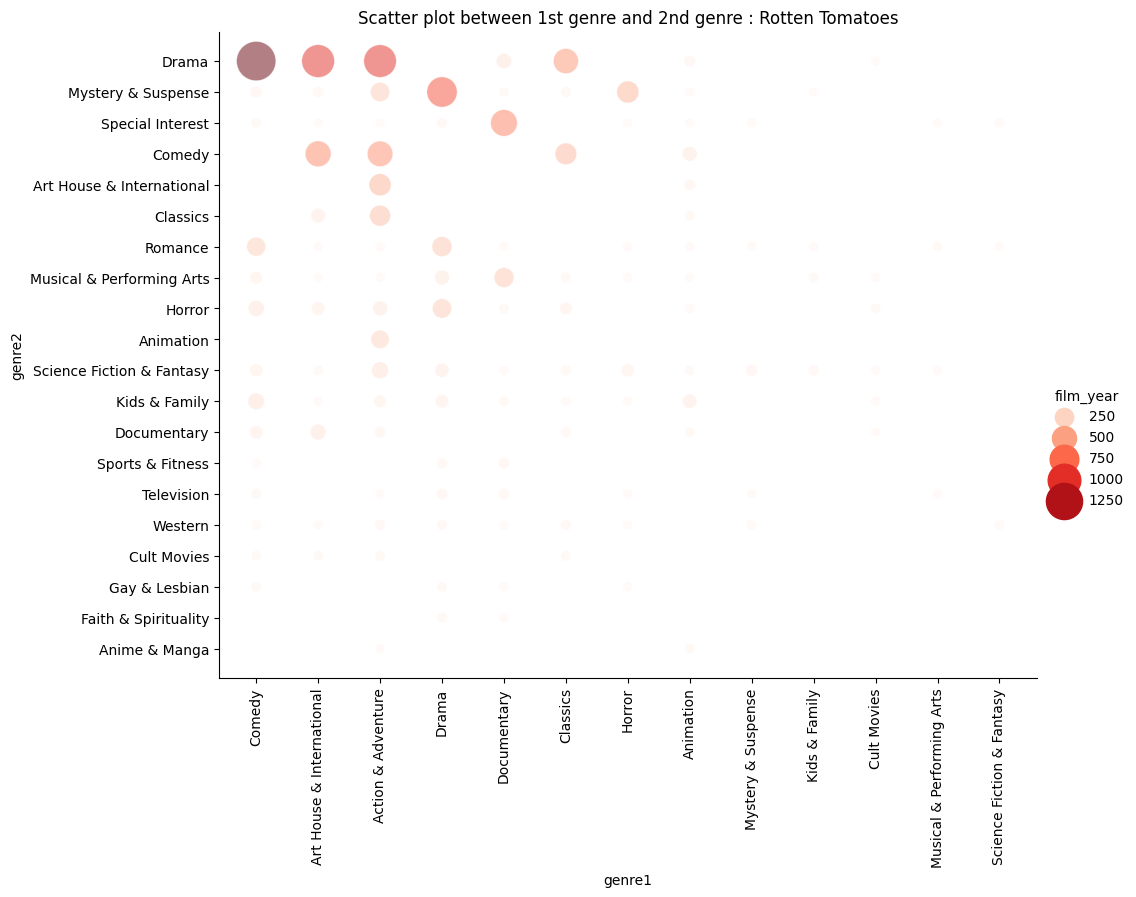

In [350]:
sns.relplot(data=rotten.groupby(['genre1', 'genre2']).agg({'film_year':'count'}).reset_index().sort_values(by='film_year', ascending=False), kind='scatter', x='genre1', y='genre2', 
            hue='film_year', size='film_year', sizes=(50,800), alpha=0.5, height=7, aspect=1.5, palette='Reds')
plt.xticks(rotation = 90)
plt.title('Scatter plot between 1st genre and 2nd genre : Rotten Tomatoes') 

Text(0.5, 1.0, 'Scatter plot between 1st genre and 2nd genre : Rotten Tomatoes (Certified-Fresh and Upright)')

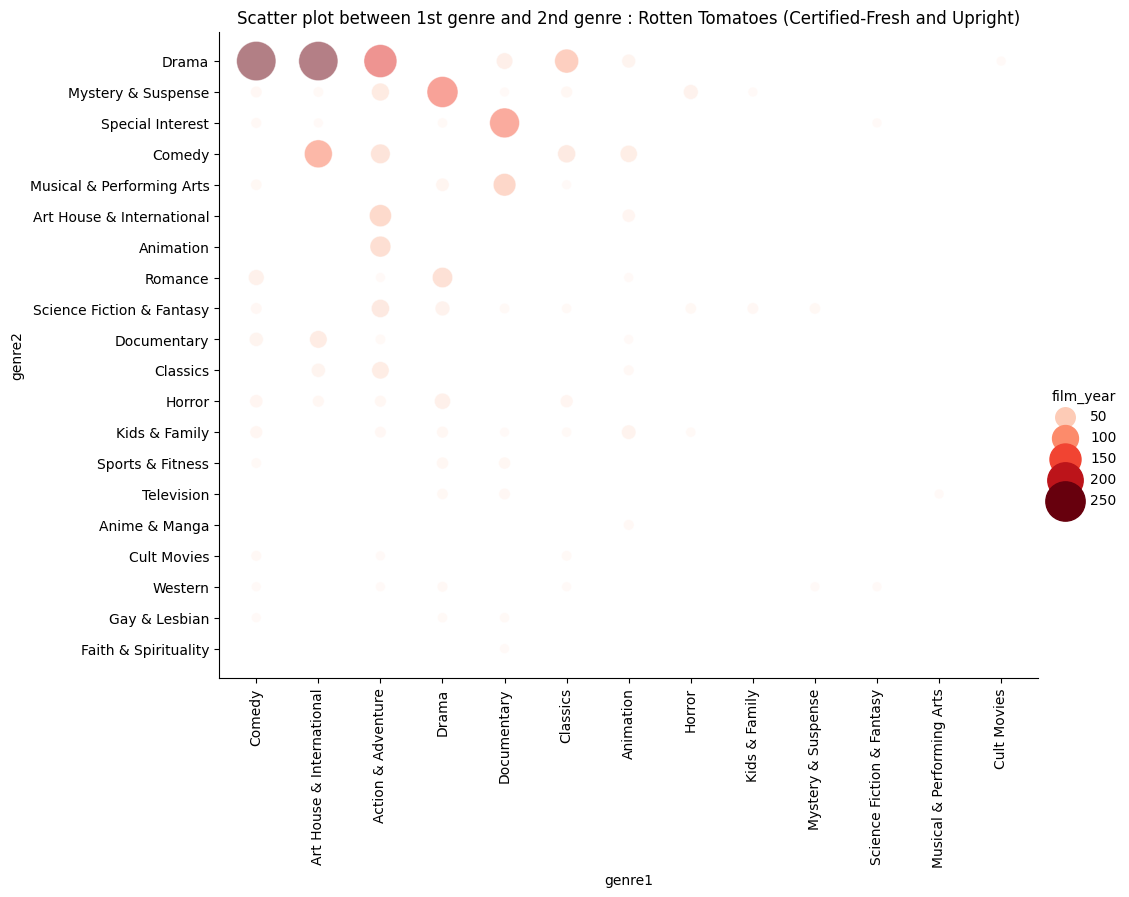

In [351]:
sns.relplot(data=rotten[(rotten['tomatometer_status'] == 'Certified-Fresh') & (rotten['audience_status'] == 'Upright')].groupby(['genre1', 'genre2']).agg({'film_year':'count'}).reset_index().sort_values(by='film_year', ascending=False), kind='scatter', x='genre1', y='genre2', 
            hue='film_year', size='film_year', sizes=(50,800), alpha=0.5, height=7, aspect=1.5, palette='Reds')
plt.xticks(rotation = 90)
plt.title('Scatter plot between 1st genre and 2nd genre : Rotten Tomatoes (Certified-Fresh and Upright)') 

<Figure size 1000x500 with 0 Axes>

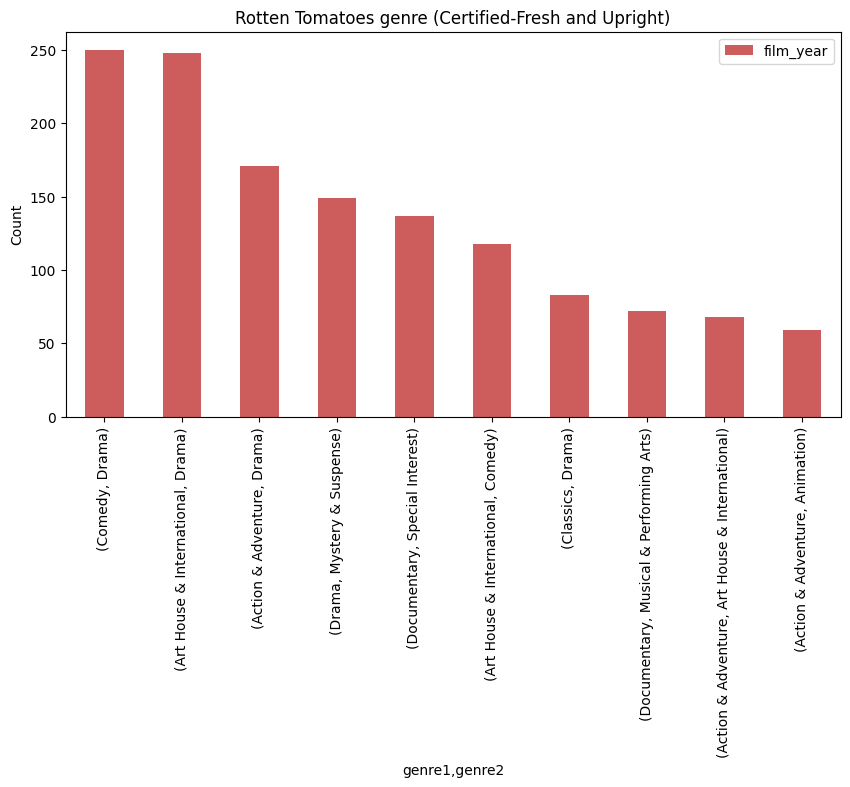

<Figure size 1000x500 with 0 Axes>

In [383]:
rotten[(rotten['tomatometer_status'] == 'Certified-Fresh') & (rotten['audience_status'] == 'Upright')].groupby(['genre1', 'genre2']).agg({'film_year':'count'}).sort_values(by='film_year', ascending=False).head(10).plot(kind='bar', width=0.5, color='indianred', figsize=(10,5))
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Rotten Tomatoes genre (Certified-Fresh and Upright)')
plt.figure(figsize=(10,5))

<Figure size 1000x500 with 0 Axes>

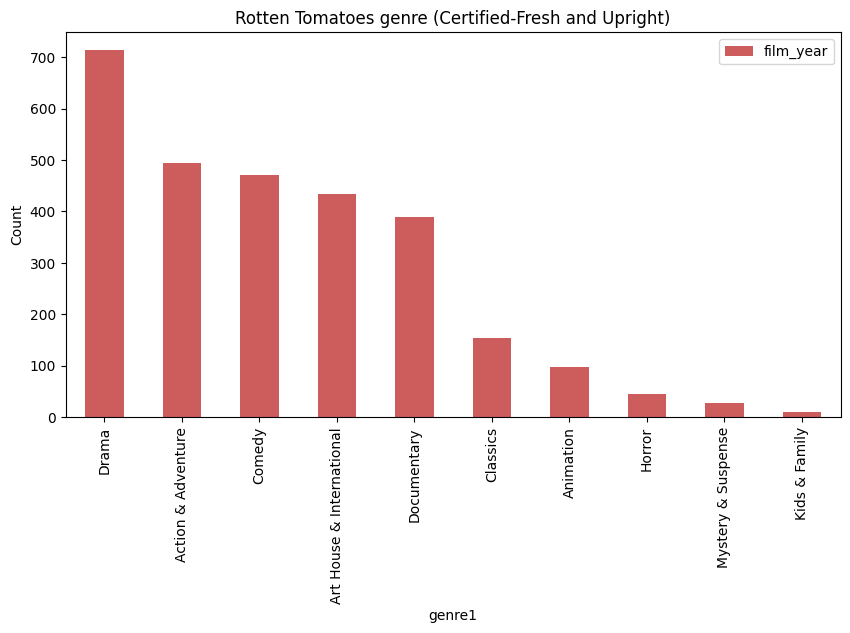

<Figure size 1000x500 with 0 Axes>

In [384]:
rotten[(rotten['tomatometer_status'] == 'Certified-Fresh') & (rotten['audience_status'] == 'Upright')].groupby('genre1').agg({'film_year':'count'}).sort_values(by='film_year', ascending=False).head(10).plot(kind='bar', width=0.5, color='indianred', figsize=(10,5))
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Rotten Tomatoes genre (Certified-Fresh and Upright)')
plt.figure(figsize=(10,5))

## IMDB/Metascore with Rotten

Text(0.5, 1.0, 'IMDB VS Metascore (seperate by Rotten Tomatoes status)')

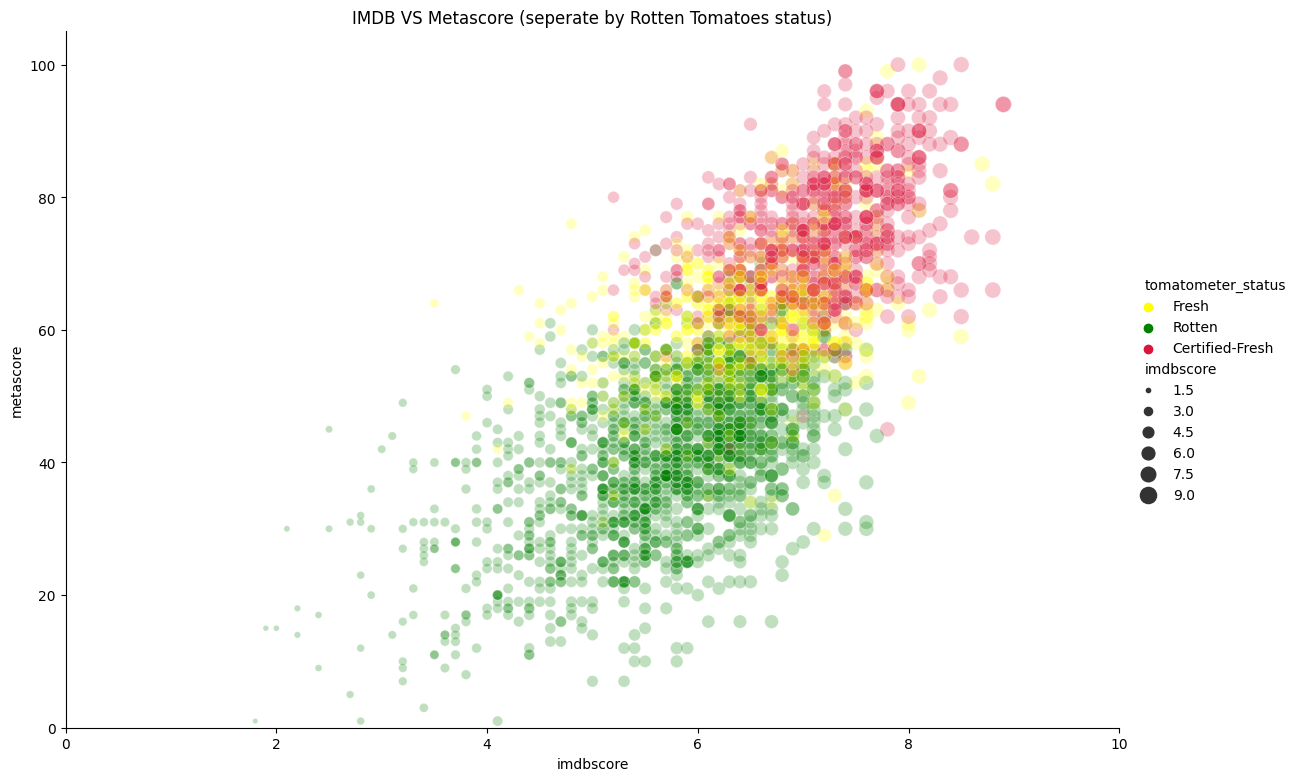

In [354]:
# sns.relplot(data=imdb_film_rotten, kind='scatter', x='imdbscore', y='metascore', col='tomatometer_status', alpha=0.25)
sns.relplot(data=imdb_film_rotten, kind='scatter', x='imdbscore', y='metascore', hue='tomatometer_status', palette=['yellow', 'green', 'crimson'], alpha=0.25, size='imdbscore', sizes=(1,150), height=7.5, aspect=1.5)
plt.axis([0,10,0,105])
plt.title('IMDB VS Metascore (seperate by Rotten Tomatoes status)')

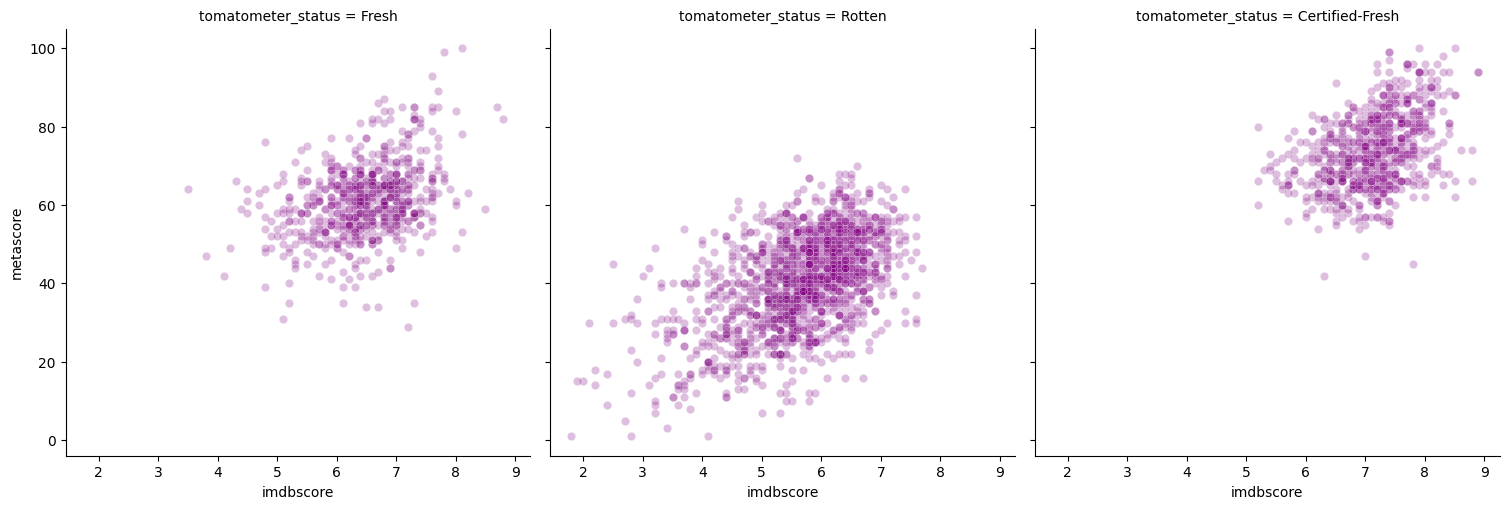

In [355]:
sns.relplot(data=imdb_film_rotten, kind='scatter', x='imdbscore', y='metascore', col='tomatometer_status', color='Purple', alpha=0.25)

(0.0, 10.0, 0.0, 105.0)

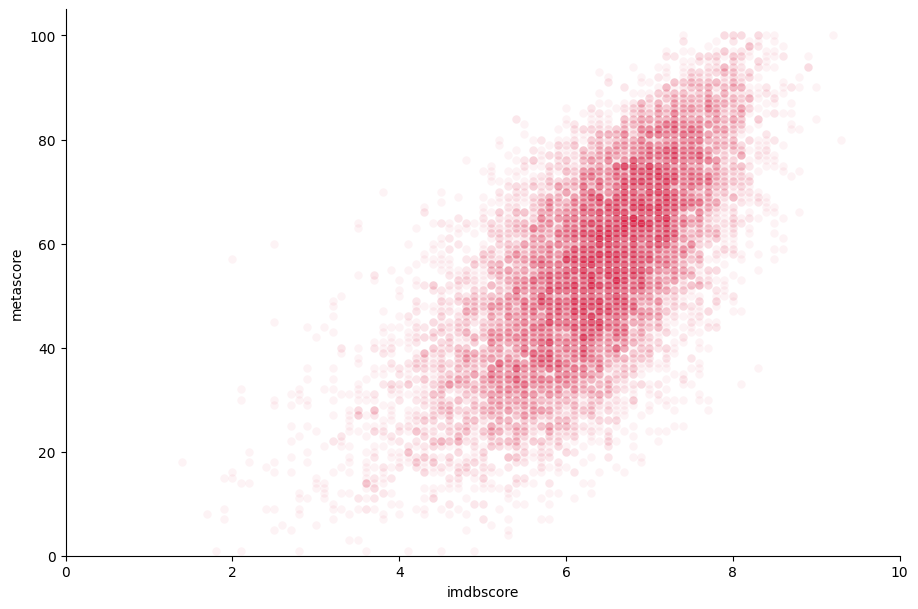

In [356]:
sns.relplot(data=imdb_film_rotten, kind='scatter', x='imdbscore', y='metascore',  color='crimson', markers='.' , alpha=0.05, height=6, aspect=1.5)
plt.axis([0,10,0,105])

(0.0, 105.0, 0.0, 10.0)

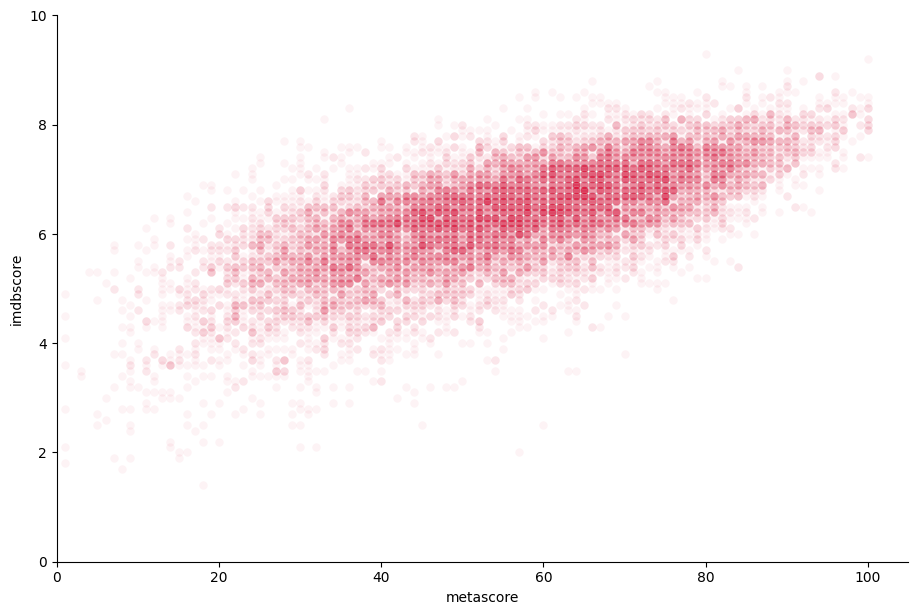

In [357]:
sns.relplot(data=imdb_film_rotten, kind='scatter', x='metascore', y='imdbscore',  color='crimson', markers='.' , alpha=0.05, height=6, aspect=1.5)
plt.axis([0,105,0,10])

(0.0, 10.0, 0.0, 105.0)

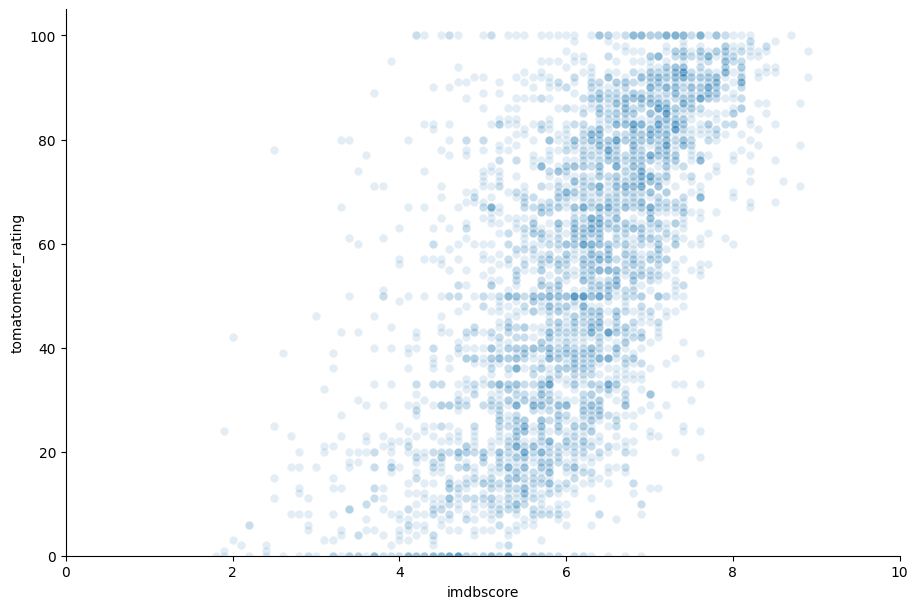

In [358]:
# ไม่พลอตคู่กับ metascore เพราะข้อมูลหายเยอะ
sns.relplot(data=imdb_film_rotten, kind='scatter', x='imdbscore', y='tomatometer_rating',  palette=['red'] , alpha=0.125, height=6, aspect=1.5)
plt.axis([0,10,0,105])

(0.0, 105.0, 0.0, 10.0)

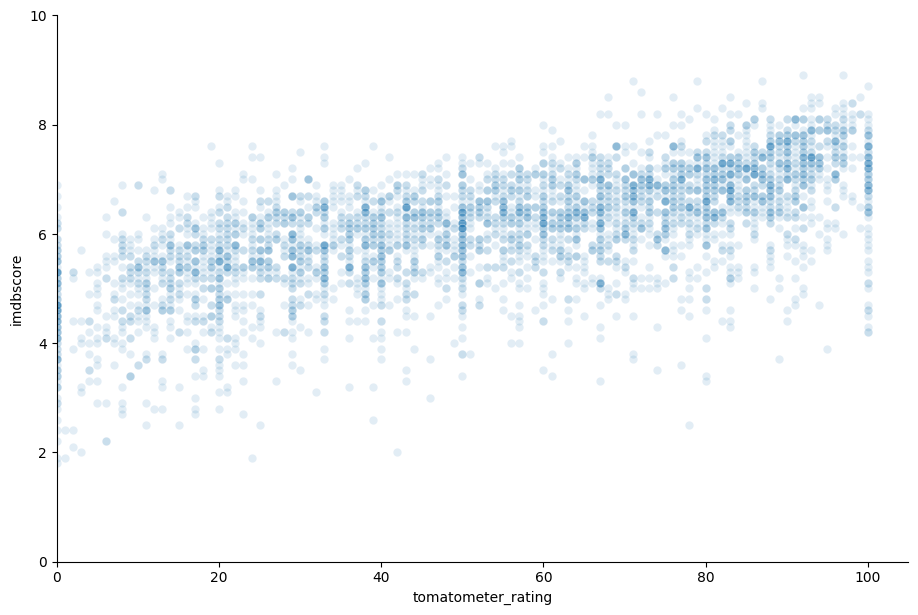

In [359]:
sns.relplot(data=imdb_film_rotten, kind='scatter', x='tomatometer_rating', y='imdbscore',  palette=['red'] , alpha=0.125, height=6, aspect=1.5)
plt.axis([0,105,0,10])

(0.0, 105.0, 0.0, 10.0)

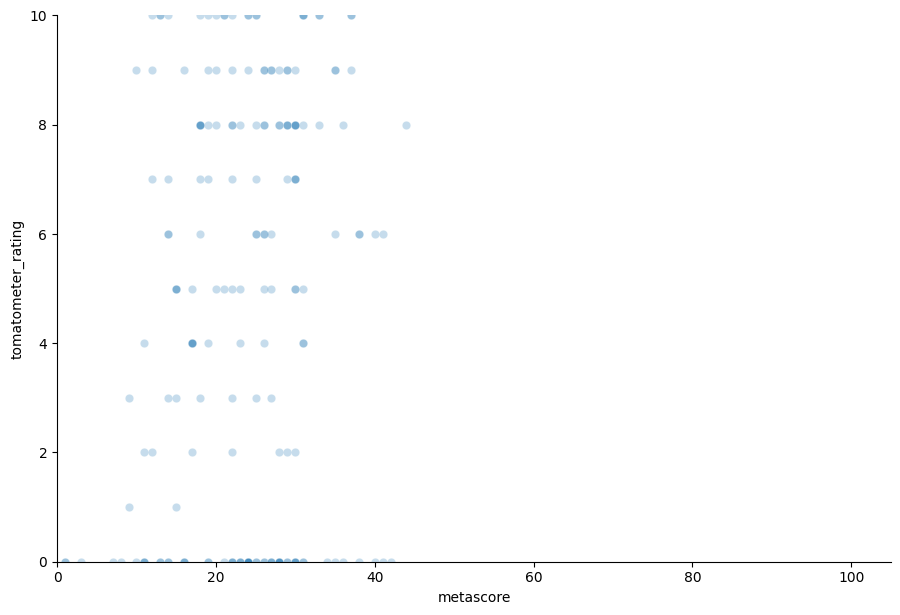

In [360]:
sns.relplot(data=imdb_film_rotten, kind='scatter', x='metascore', y='tomatometer_rating',  palette=['red'] , alpha=0.25, height=6, aspect=1.5)
plt.axis([0,105,0,10])

(0.0, 105.0, 0.0, 10.0)

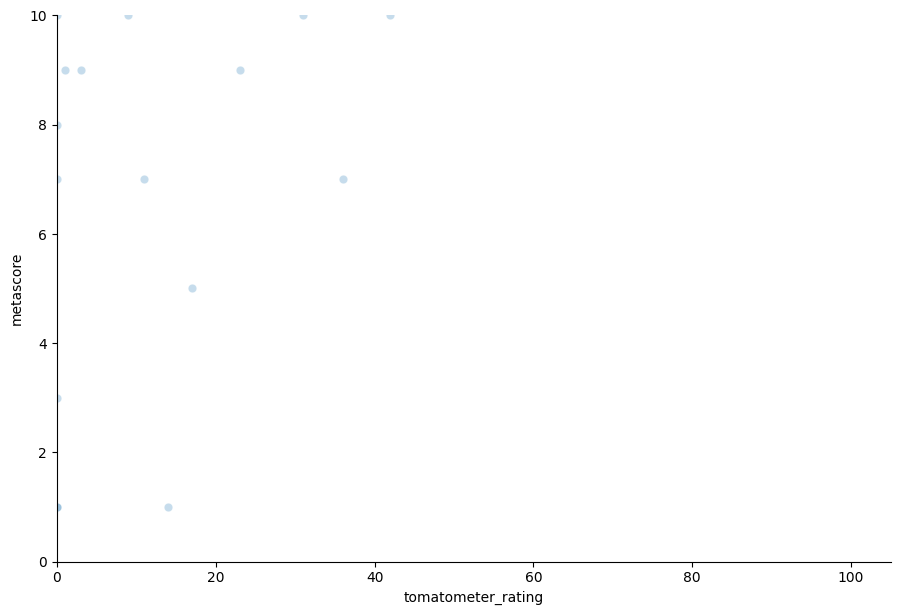

In [361]:
sns.relplot(data=imdb_film_rotten, kind='scatter', x='tomatometer_rating', y='metascore',  palette=['red'] , alpha=0.25, height=6, aspect=1.5)
plt.axis([0,105,0,10])

## Oscar with IMDB/Rotten

Text(0.5, 1.0, 'IMDB VS Metascore (seperate by Rotten Tomatoes status)')

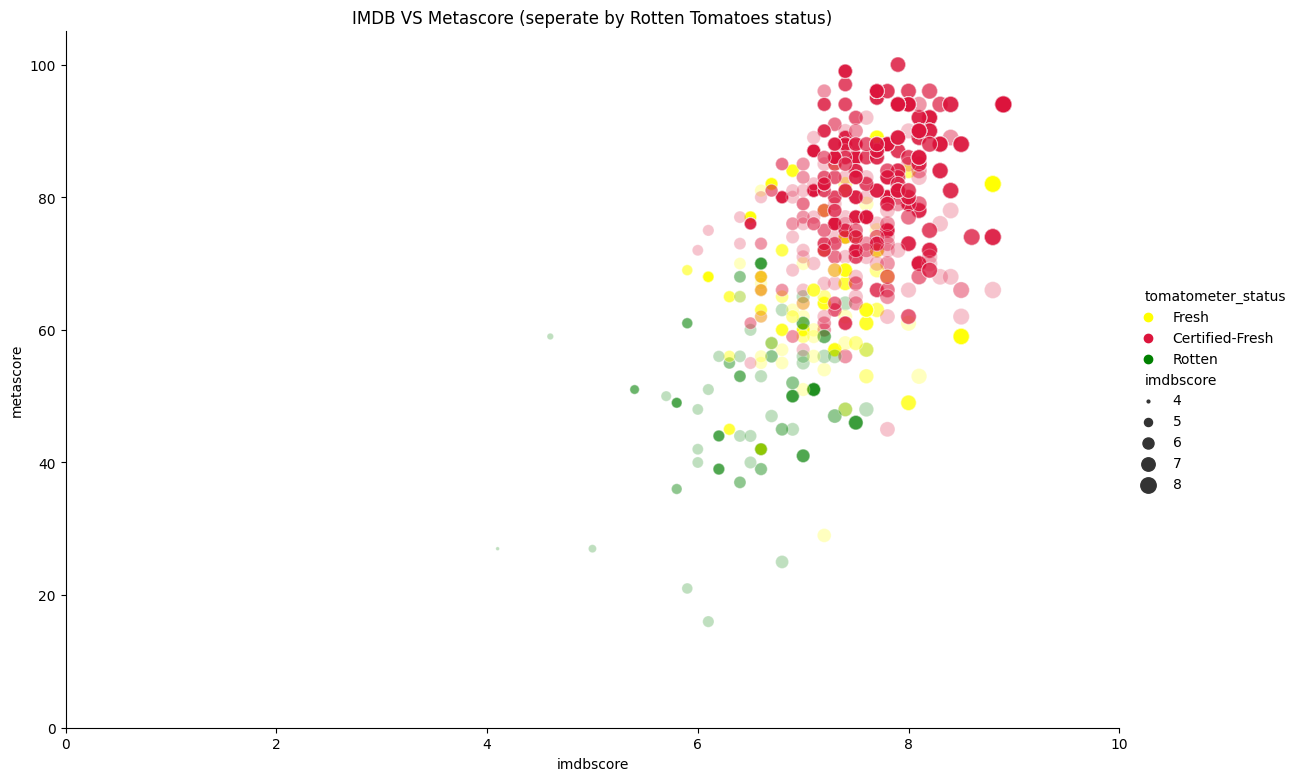

In [362]:
sns.relplot(data=oscar_imdb_rotten, kind='scatter', x='imdbscore', y='metascore', hue='tomatometer_status', palette=['yellow', 'crimson', 'green'], alpha=0.25, size='imdbscore', sizes=(1,150), height=7.5, aspect=1.5)
plt.axis([0,10,0,105])
plt.title('IMDB VS Metascore (seperate by Rotten Tomatoes status)')

In [363]:
# which nominated movie got 'Rotten' status
n = 0
for i in oscar_imdb_rotten[oscar_imdb_rotten['tomatometer_status'] == 'Rotten']['film&year'].unique():
  print(i)
  n += 1
print(n)

Picnic (1955)
Babes in Toyland (1961)
Camelot (1967)
Hello, Dolly! (1969)
Tora! Tora! Tora! (1970)
Cromwell (1970)
Jesus Christ Superstar (1973)
Robin Hood (1973)
Funny Lady (1975)
King Kong (1976)
Airport '77 (1977)
California Suite (1978)
Meteor (1979)
Heartbeeps (1981)
Annie (1982)
Yes, Giorgio (1982)
Flashdance (1983)
Footloose (1984)
Dune (1984)
Top Gun (1986)
Ironweed (1987)
Mannequin (1987)
Willow (1988)
Harlem Nights (1989)
Valmont (1989)
Basic Instinct (1992)
Poetic Justice (1993)
Nell (1994)
Wyatt Earp (1994)
Junior (1994)
Batman Forever (1995)
Pocahontas (1995)
Waterworld (1995)
Twister (1996)
Dragonheart (1996)
Con Air (1997)
Velvet Goldmine (1998)
Patch Adams (1998)
Life (1999)
Pearl Harbor (2001)
Kate & Leopold (2001)
Vanilla Sky (2001)
The Time Machine (2002)
Shark Tale (2004)
Troy (2004)
The Village (2004)
Marie Antoinette (2006)
Poseidon (2006)
Elizabeth: The Golden Age (2007)
Across the Universe (2007)
Norbit (2007)
Transformers (2007)
Australia (2008)
Nine (2009)
Ali

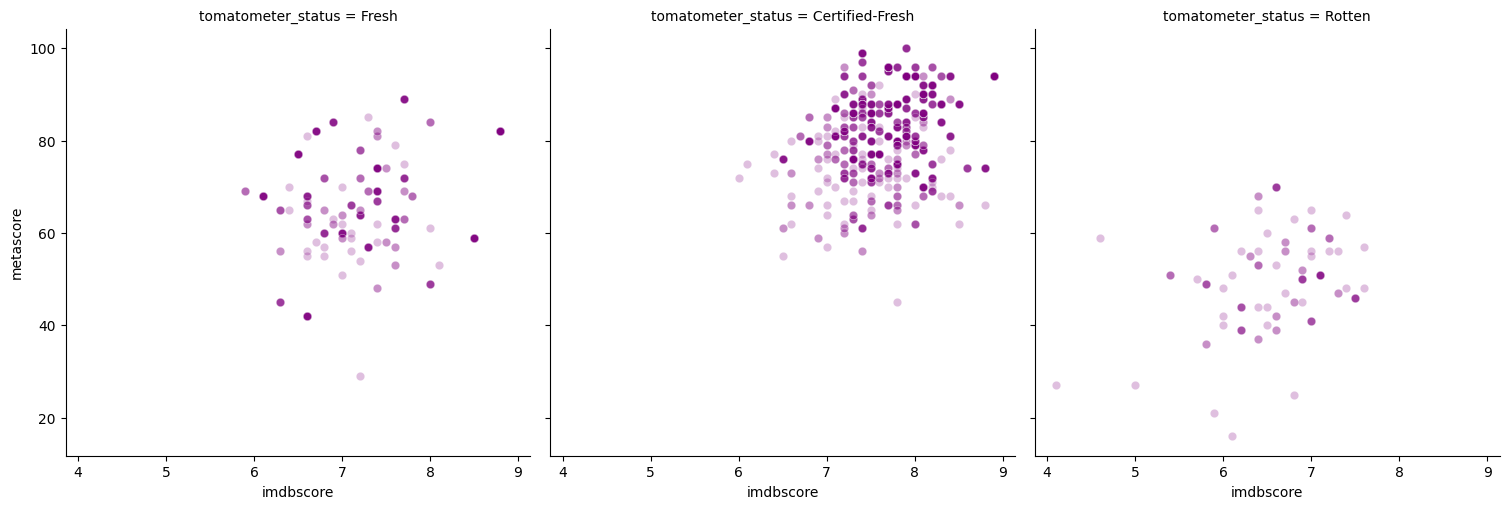

In [364]:
sns.relplot(data=oscar_imdb_rotten, kind='scatter', x='imdbscore', y='metascore', col='tomatometer_status', color='Purple', alpha=0.25)

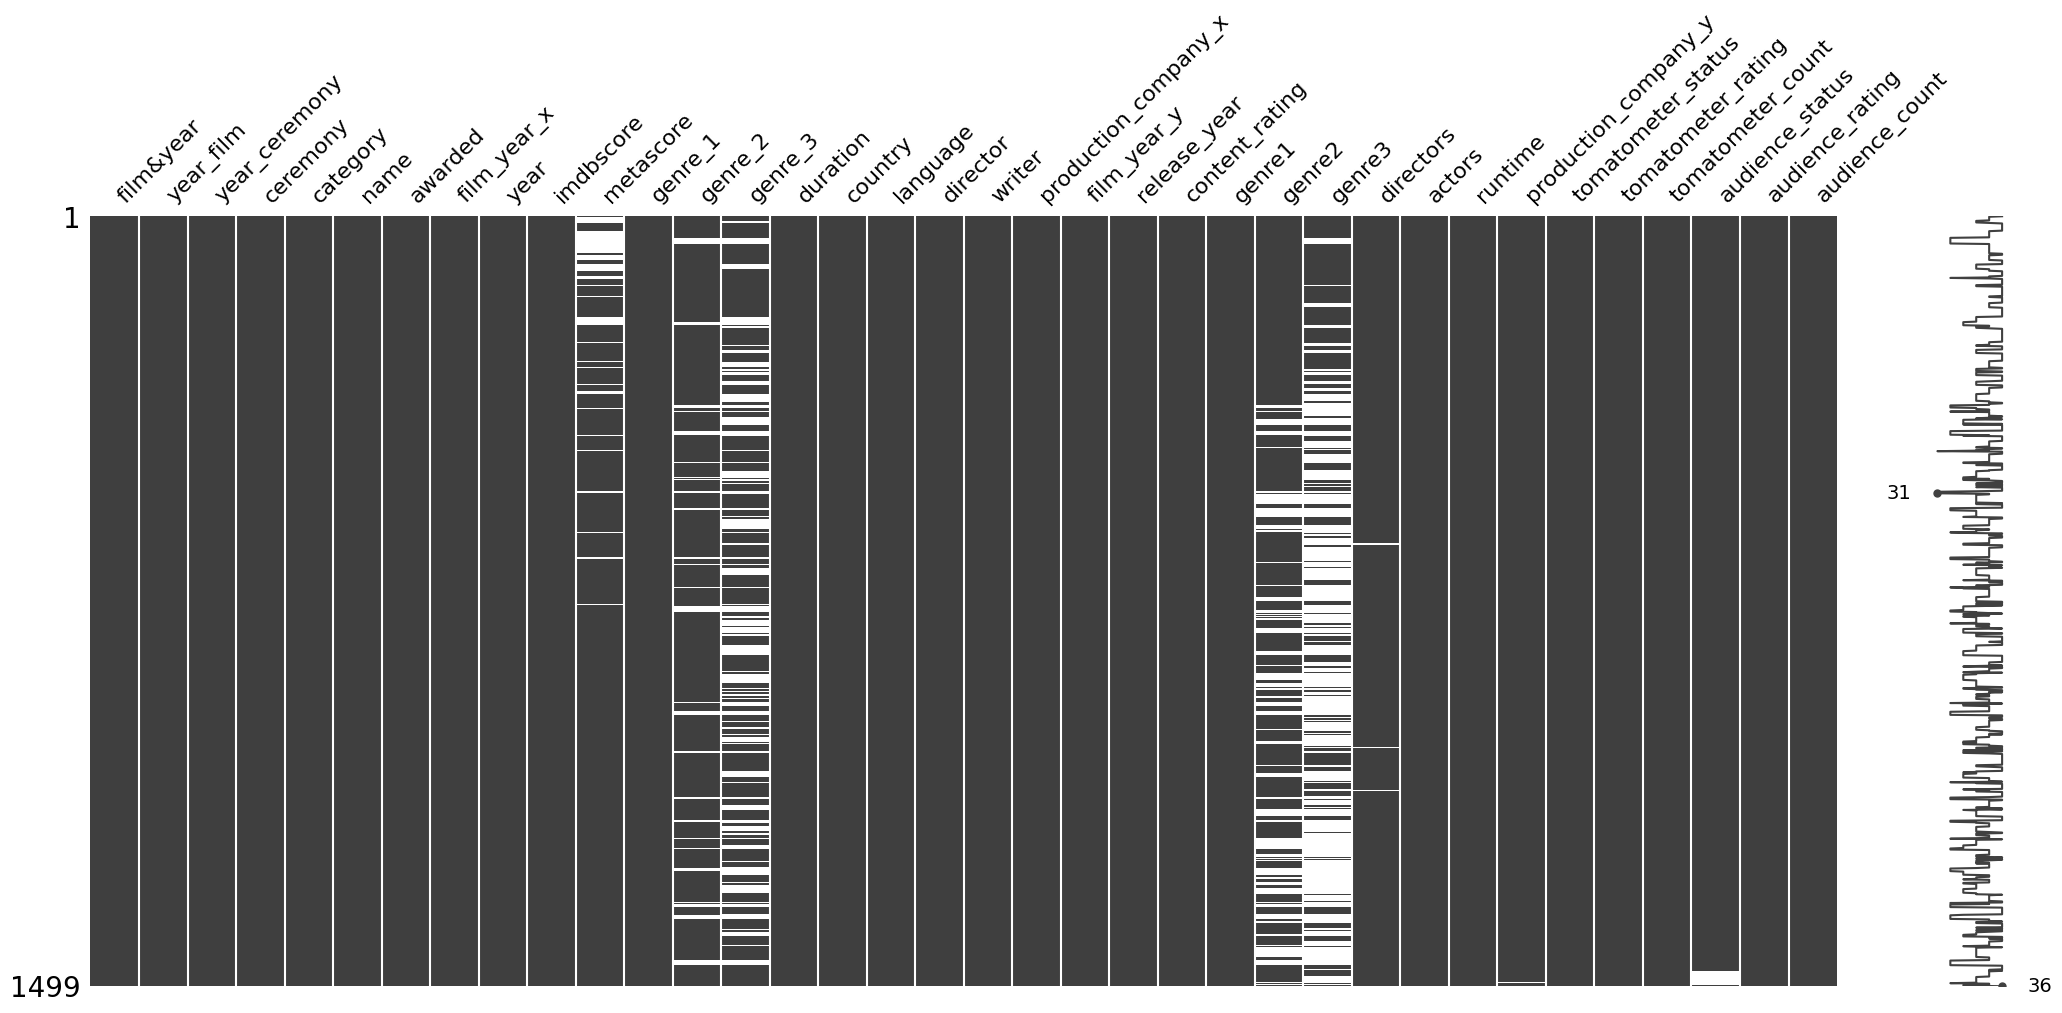

In [365]:
# เลือกใช้ genre_1 ของชุดข้อมูล IMDB เพราะมีความสมบูรณ์มากกว่า
msno.matrix(oscar_imdb_rotten)

Text(0.5, 1.0, 'Scatter plot between 1st genre and 2nd genre (Nominated films)')

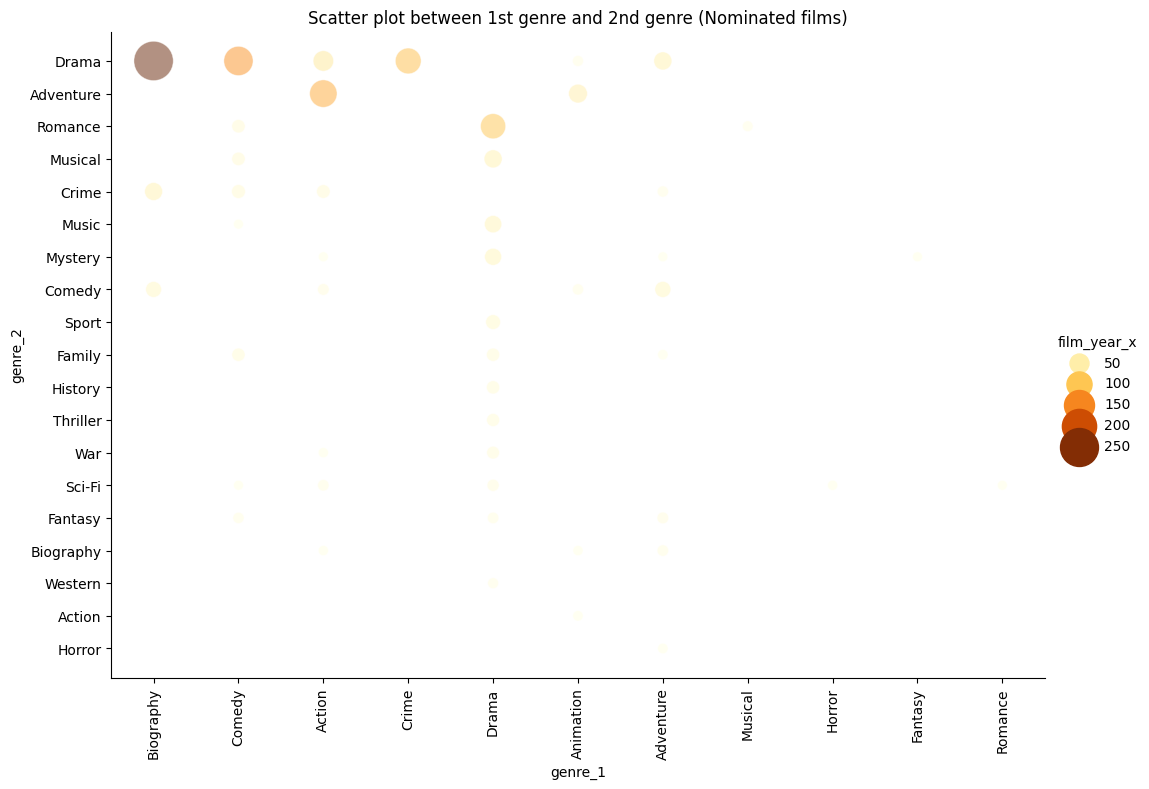

In [366]:
sns.relplot(data=oscar_imdb_rotten.groupby(['genre_1', 'genre_2']).agg({'film_year_x':'count'}).reset_index().sort_values(by='film_year_x', ascending=False), kind='scatter', x='genre_1', y='genre_2', 
            hue='film_year_x', size='film_year_x', sizes=(50,800), palette='YlOrBr',alpha=0.5, height=7, aspect=1.5)
plt.xticks(rotation = 90)
plt.title('Scatter plot between 1st genre and 2nd genre (Nominated films)') 

Text(0.5, 1.0, 'Scatter plot between 1st genre and 2nd genre (Awarded films)')

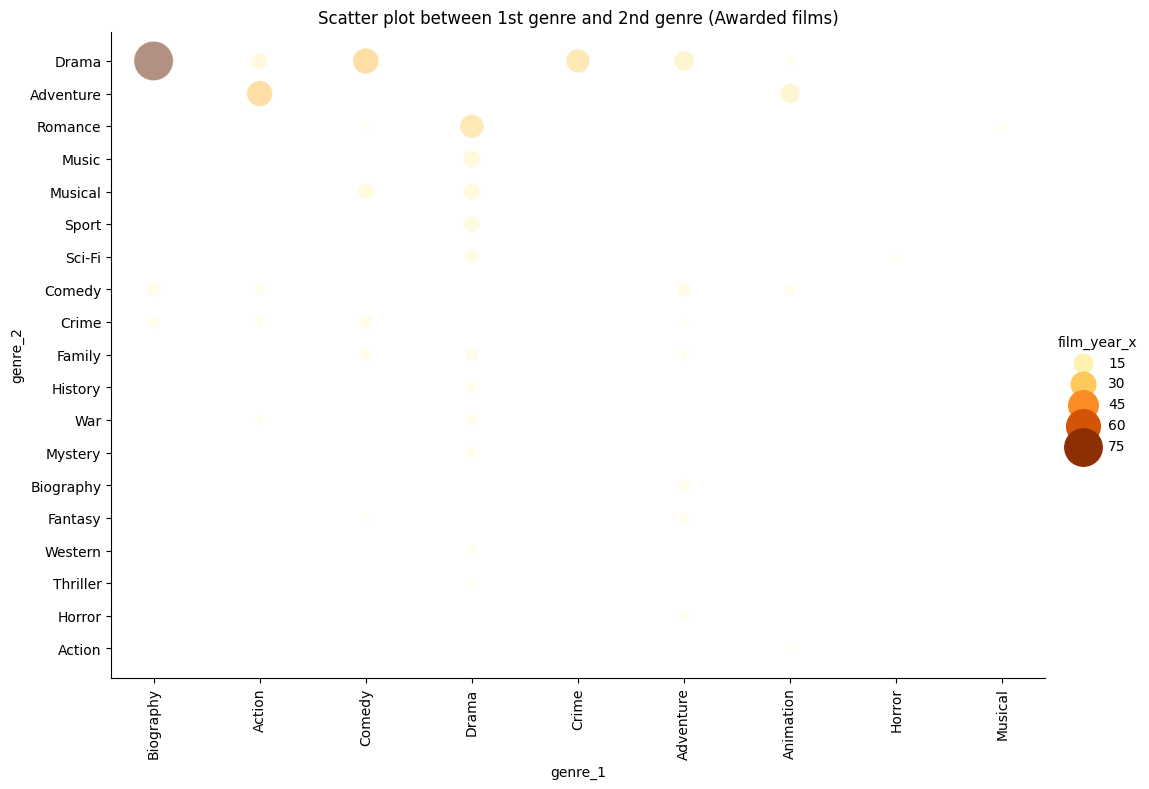

In [367]:
sns.relplot(data=oscar_imdb_rotten[oscar_imdb_rotten['awarded'] == True].groupby(['genre_1', 'genre_2']).agg({'film_year_x':'count'}).reset_index().sort_values(by='film_year_x', ascending=False), kind='scatter', 
            x='genre_1', y='genre_2', hue='film_year_x', size='film_year_x', sizes=(50,800), palette='YlOrBr',alpha=0.5, height=7, aspect=1.5)
plt.xticks(rotation = 90)
plt.title('Scatter plot between 1st genre and 2nd genre (Awarded films)') 

<Figure size 1000x500 with 0 Axes>

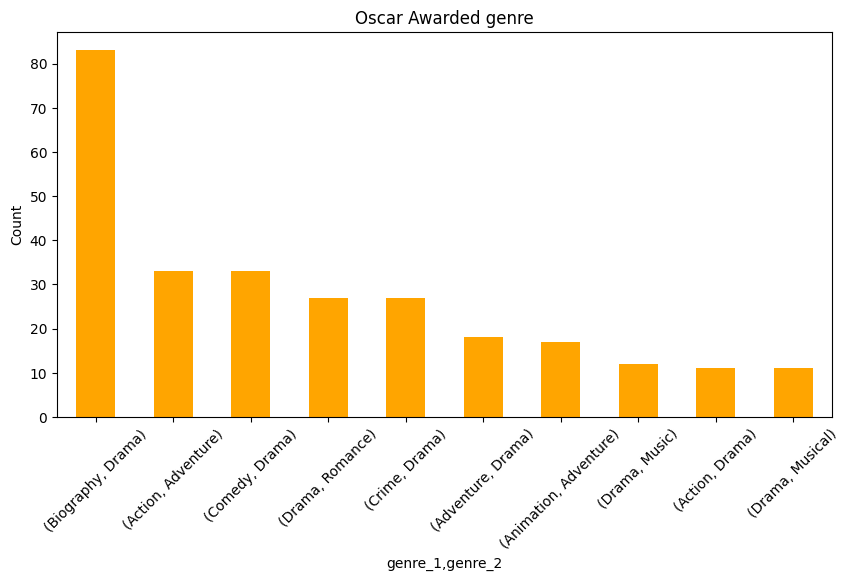

<Figure size 1000x500 with 0 Axes>

In [380]:
oscar_imdb_rotten[oscar_imdb_rotten['awarded'] == True].groupby(['genre_1', 'genre_2']).agg({'film_year_x':'count'}).sort_values(by='film_year_x', ascending=False).head(10).plot(kind='bar', width=0.5, color='orange', figsize=(10,5), legend=None)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Oscar Awarded genre')
plt.figure(figsize=(10,5))
# cadetblue

<Figure size 1000x500 with 0 Axes>

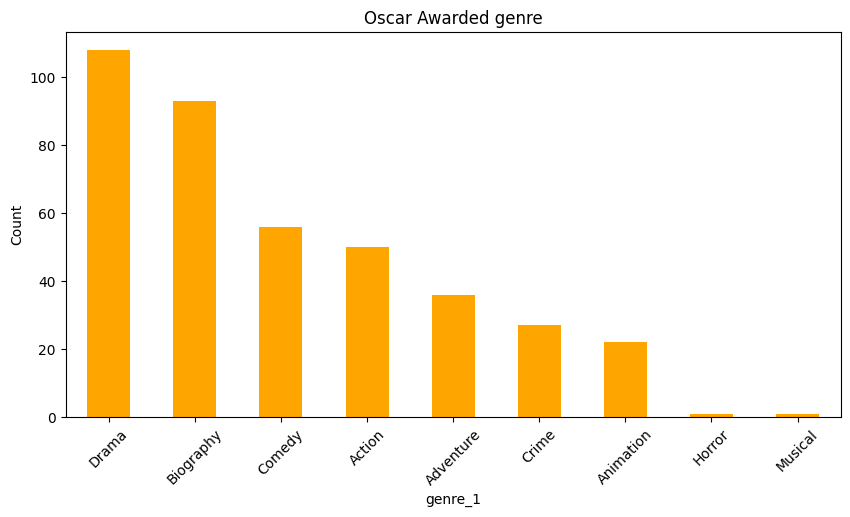

<Figure size 1000x500 with 0 Axes>

In [385]:
oscar_imdb_rotten[oscar_imdb_rotten['awarded'] == True].groupby('genre_1').agg({'film_year_x':'count'}).sort_values(by='film_year_x', ascending=False).head(10).plot(kind='bar', width=0.5, color='orange', figsize=(10,5), legend=None)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Oscar Awarded genre')
plt.figure(figsize=(10,5))